### Description: TwoD Case

This notebook is organized such that the first few blocks, up to "Basic analysis," perform the initial analysis and save the options for subsequent blocks. Therefore, the first few blocks need to be executed each time.

The analysis functions are implemented in a Python file at the base level to facilitate the generation of test functions and maintain version control. These functions are then called in the code blocks of the notebook, where additional plotting and organizing utilities are used to produce figures and tables.

### Package Import (Global)

In [1]:
## Import block
import os, sys
import datetime
import numpy as np
import pandas as pd
from shutil import rmtree, copy
from matplotlib import pyplot as plt
from matplotlib import gridspec, cm
from PIL import Image, ImageDraw, ImageFont
from scipy.interpolate import interp1d, UnivariateSpline

# directory to the aspect Lab
ASPECT_LAB_DIR = os.environ['ASPECT_LAB_DIR']
RESULT_DIR = os.path.join(ASPECT_LAB_DIR, 'results')

sys.path.append(os.path.join(ASPECT_LAB_DIR))

import shilofue.TwoDSubduction0.Cases as TwoDCases
import shilofue.PlotCase as PlotCase
import shilofue.TwoDSubduction0.PlotCase as TwoDPlotCase
import shilofue.TwoDSubduction0.VtkPp as TwoDVtkPp
import shilofue.PlotDepthAverage as PlotDepthAverage
from shilofue.PlotCombine import PlotCombineExecute, PlotCombineFigures
from shilofue.PlotHeatFlow import HeatFlowRetriveProfile, HeatFlowRetriveZeroCrossings, group_adjacent_indices, HeatFlowRetriveForearcMaximumCase
from shilofue.TwoDSubduction0.PlotVisit import VISIT_OPTIONS, PREPARE_RESULT_OPTIONS
from shilofue.TwoDSubduction0.Group import CASE_SUMMARY

sys.path.append(os.path.join(ASPECT_LAB_DIR, 'utilities', "python_scripts"))
sys.path.append("/home/lochy/ASPECT_PROJECT/HaMaGeoLib/")
import Utilities

# py_temp file
py_temp_dir = os.path.join(ASPECT_LAB_DIR, "py_temp_files")
os.makedirs(py_temp_dir, exist_ok=True) # Ensure the directory exists

today_date = datetime.datetime.today().strftime("%Y-%m-%d") # Get today's date in YYYY-MM-DD format
py_temp_file = os.path.join(py_temp_dir, f"py_temp_{today_date}.sh")

if not os.path.exists(py_temp_file):
    bash_header = """#!/bin/bash
# =====================================================
# Script: py_temp.sh
# Generated on: {date}
# Description: Temporary Bash script created by Python
# =====================================================

""".format(date=today_date)
    with open(py_temp_file, "w") as f:
        f.write(bash_header)

print(f"File ensured at: {py_temp_file}")

File ensured at: /home/lochy/ASPECT_PROJECT/aspectLib/py_temp_files/py_temp_2025-05-24.sh


In [2]:
# constants
year = 365*24.0*3600.0 # s in year

In [3]:
# import inspect
# from hamageolib import hamageolib_utils

# print("Everything:", dir(hamageolib_utils))

# # List all functions
# functions = [f for f in dir(hamageolib_utils) if inspect.isfunction(getattr(hamageolib_utils, f))]
# print("Functions:", functions)
	
# # List all classes
# classes = [c for c in dir(hamageolib_utils) if inspect.isclass(getattr(hamageolib_utils, c))]
# print("Classes:", classes)

In [4]:
## Import block1

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import hamageolib
import hamageolib.utils.plot_helper as plot_helper
from hamageolib.utils.plot_helper import convert_eps_to_pdf, extract_image_by_size, overlay_images_on_blank_canvas, add_text_to_image
from hamageolib.utils.handy_shortcuts_haoyuan  import Mute
from hamageolib.core.melt import ROCK_MELTING
from hamageolib.research.haoyuan_2d_subduction.workflow_scripts  import *

### Preliminaries

#### System path

The path to the project directory

    local_TwoDSubduction_dir

The path to the project directory on server

    remote_TwoDSubduction_dir

In [5]:
## PATH 1
local_TwoDSubduction_dir = "/mnt/lochz/ASPECT_DATA/TwoDSubduction"
local_EntropySub_dir = "/mnt/lochy/ASPECT_DATA/EntropySubduction"
remote_TwoDSubduction_dir = "peloton:/group/billengrp-mpi-io/lochy/TwoDSubduction"

assert(os.path.isdir(local_TwoDSubduction_dir))

#### case name

case name (relative path to local_TwoDSubduction_dir)

    case_name

In [6]:
## Case name

from hamageolib.research.haoyuan_2d_subduction.post_process import CASE_OPTIONS

# case_name = "EBA_CDPT_morb_dE/eba_cdpt_coh500_SA80.0_cd7.5_log"

# case_name = "EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr10"

# case_name = "EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11"

# case_name = "EBA_CDPT24_5/eba_cdpt_coh500_SA120.0_ss500.0_sv20_cd100.0_dc7.5"

# case_name = "EBA_CDPT23_4_re/eba_cdpt_coh500_cd100.0_cd7.5_sv19"

# case_name = "EBA_CDPT24_5/eba_cdpt_coh500_SA40.0_ss500.0_sv20_cd100.0_dc7.5"

# case_name = "EBA_CDPT24_5/eba_cdpt_coh500_SA120.0_ss500.0_sv20_cd100.0_dc7.5"

# case_name = "EBA_CDPT_test_gr_4/eba_cdpt_FCWL_SA40.0_OA20.0_cd7.5_ss500.0_gr11"

# case_name = "EBA_CDPT_test_gr_4/eba_cdpt_PTWL_SA40.0_OA20.0_cd7.5_ss500.0_gr11"

# case_name = "EBA_CDPT18/eba_cdpt_coh500_SA80.0_OA40.0_cd100.0_cd15.0_gr9"

# case_name = "EBA_CDPT18/eba_cdpt_coh500_SA80.0_OA40.0_cd100.0_cd20.0_gr9"

# case_name = "EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11"

# case_name = "EBA_CDPT_test_gr_0/eba_cdpt_FCWL_SA80.0_cd7.5_gr11"

# case_name = "EBA_CDPT26/eba_cdpt_coh500_SA80.0_OA40.0_du2.3_sv19.5_gr12"

# case_name = "EBA_CDPT23_6/eba_cdpt_coh500_SA80.0_ss100.0_clw4_clp2.5n"

# case_name = "EBA_CDPT23_6/eba_cdpt_coh500_SA80.0_ss100.0_clp2.5n"

# case_name = "EBA_CDPT20/eba_cdpt_coh500_SA80.0_OA80.0_cd100.0_cd7.5_gr9"

# case_name = "EBA_CDPT18/eba_cdpt_coh500_SA80.0_OA40.0_cd100.0_cd5.0_gr9"

# case_name = "EBA_CDPT23_4_re/eba_cdpt_coh500_cd100.0_cd7.5_sv19"

# case_name = "EBA_CDPT24_2/eba_cdpt_coh500_SA80.0_ss500.0_sv21_cd100.0_dc7.5"

# case_name = "EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11"

case_name = "EBA_CDPT26/eba_cdpt_coh500_SA80.0_OA40.0_du0.8_sv19_gr12_particles_lb"

local_dir = os.path.join(local_TwoDSubduction_dir, case_name)

assert(os.path.isdir(local_dir))

CaseOptions = CASE_OPTIONS(local_dir)

# resample steps by a time interval
time_interval = 5e5 # 2. use a time interval, for making animations
resampled_df = CaseOptions.resample_visualization_df(time_interval)

### Basic Analysis

Plot Linear results and prepare the scripts for visualization

The next block will generate plots of runtime, solver statistics, etc. It will also compose a script to run in ParaView or VisIt.

It is preferred to first run the next block for slab morphology, analyze the result, and fix the steps to visualize in this block.

The max_velocity is useful for rescaling the color for the velocity. To pick a reasonable value, first view the range from outputs with max_velocity set to -1.0. The unit to use is m/yr.

#### Paraview scripts

In [16]:
# define a function for round values
round_values = lambda values: [round(x) for x in values]

# prepare the graphical_steps
graphical_steps = [50]; slices=None # 1. specify steps
# graphical_steps = round_values(resampled_df["Time"].values / float(resampled_df.attrs["Time between graphical output"]))
# slices = None

# types of plot to include
# The available types of plots are
# plot_types = ["upper_mantle", "whole", "whole_whole"]
# plot_types = ["whole_whole"]; rotation_plus = 0.0
# plot_types = ["upper_mantle"]; rotation_plus = 0.47 # for plotting the upper mantle
# plot_types = ["wedge_bigger"]; rotation_plus = 0.0 # 
# todo_wedge
plot_types = ["wedge_02252025"]; rotation_plus = 0.97 #

# Additional fields in case of two crustal layers
# additional_fields = ["spcrust_up", "spcrust_low"]  # in case of two crustal layers
additional_fields = [] # in case of one crustal layer

config = {
    "RESULT_DIR": RESULT_DIR,                   # directory to write output .txt
    "py_temp_file": py_temp_file,          # where to write pvpython script
    "PlotCase": PlotCase,                               # your PlotCase module
    "TwoDPlotCase": TwoDPlotCase,                       # your TwoDPlotCase module

    # ---
    # Visualization and plotting options
    # True: save a complete result
    # False: prepare for figures in a paper
    # ---
    "plot_axis": False,
    "graphical_steps": graphical_steps,
    "slices": None,
    "max_velocity": -1.0,
    "plot_types": plot_types,
    "rotation_plus": rotation_plus,
    "additional_fields": [],
    "CaseOptions": CaseOptions
}

Visit_Options = run_2d_subduction_visualization(local_dir, config)

PlotCaseRun: operating
Ploting statistic results


/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/Plot.py:307: DataNotFoundWarning: The field Outward_heat_flux_through_boundary_with_indicator_1 doesn't exist. We will keep ploting,but you will get a blank one for this field name
  self.DataNotFoundWarning)
/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/Plot.py:307: DataNotFoundWarning: The field Outward_heat_flux_through_boundary_with_indicator_2 doesn't exist. We will keep ploting,but you will get a blank one for this field name
  self.DataNotFoundWarning)
/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/Plot.py:307: DataNotFoundWarning: The field Outward_heat_flux_through_boundary_with_indicator_3 doesn't exist. We will keep ploting,but you will get a blank one for this field name
  self.DataNotFoundWarning)
/home/lochy/ASPECT_PROJECT/aspectLib/shilofue/Plot.py:307: DataNotFoundWarning: The field Global_mass_for_composition_C_1 doesn't exist. We will keep ploting,but you will get a blank one for this field name
  self.DataNotFoundWarning)


New figure: /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11/img/Statistic.png
Ploting run time
awk -f /home/lochy/ASPECT_PROJECT/aspectLib/bash_scripts/awk_states/parse_block_output /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11/output/log.txt > /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11/output/py_outputs/run_time_output


/home/lochy/anaconda3/envs/aspectLib/lib/python3.7/site-packages/numpy/lib/function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/lochy/anaconda3/envs/aspectLib/lib/python3.7/site-packages/numpy/lib/function_base.py:1085: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/lochy/anaconda3/envs/aspectLib/lib/python3.7/site-packages/numpy/lib/function_base.py:1086: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/lochy/anaconda3/envs/aspectLib/lib/python3.7/site-packages/numpy/lib/function_base.py:1092: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/home/lochy/anaconda3/envs/aspectLib/lib/python3.7/site-packages/numpy/lib/function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/loc

New figure: /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11/img/run_time.png
solver_scheme,  single Advection, iterated defect correction Stokes
Plotting newton solver history
New figure (new): /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11/img/newton_solver_history.png
PlotCaseRun in TwoDSubduction0: operating
Generating paraview scripts
saved file: /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11/paraview_scripts/slab.py


Display the results

In [8]:
# from IPython.display import display, Image

# display(Image(filename=os.path.join(local_dir, "img", "Statistic.png")))
# display(Image(filename=os.path.join(local_dir, "img", "run_time.png")))
# display(Image(filename=os.path.join(local_dir, "img", "newton_solver_history.png")))

#### Paraview scripts stepwise

To generate for animation, we follow stepwise variables, for example the trench position.

In the following script:

    - The plot is rotated so that the trench is put inside the plot region.
    - Separate scripts are generate for the time steps.
    - A bash script to run them in batch is generated.

In [9]:
# todo_split
generate_paraview_script_stepwise = False

time_interval = 5e5

if generate_paraview_script_stepwise:

    # options in plot
    diff_angle = 1.5 # deg, to match the frame we use
    Visit_Options.options["PLOT_TYPES"] = ["wedge_bigger"]

    # step
    resampled_df = CaseOptions.resample_visualization_df(time_interval)
    graphical_steps = round_values(resampled_df["Time"].values / float(resampled_df.attrs["Time between graphical output"]))

    # Assert existence of the slab morphology file
    slab_morph_file = os.path.join(local_dir, 'vtk_outputs', 'slab_morph_t1.00e+05.txt')
    if not os.path.isfile(slab_morph_file):
        raise FileNotFoundError(f"The file '{slab_morph_file}' does not exist.")

    # Read simulation log data
    pd_data = read_aspect_header_file(slab_morph_file)
    pvtu_steps = pd_data["pvtu_step"]
    times = pd_data["time"]
    trenches = pd_data["trench"]
    shallow_trenches = pd_data["shallow trench"]
    slab_depthes = pd_data["slab depth"]
    sp_velocities = pd_data["subducting plate velocity"]
    ov_velocities = pd_data["overiding plate velocity"]

    # Make the directory to hold the scripts
    print("Generating paraview scripts")
    odir = os.path.join(local_dir, 'paraview_scripts', "stepwise")
    if not os.path.isdir(odir):
        os.mkdir(odir)

    # generate paraview scripts
    for i, graphical_step in enumerate(graphical_steps):        
        print("i: ", i)
        print("graphical_step:", graphical_step)
        Visit_Options.options['GRAPHICAL_STEPS'] = [graphical_step]

        _time = float(resampled_df.attrs["Time between graphical output"]) * graphical_step
        i1 = (np.abs(times - _time)).argmin() # index nearest to _time
        trench = shallow_trenches[i1]
        trench_deg = trench * 180.0 / np.pi

        ofile = os.path.join(odir, 'slab_%d.py' % (graphical_step))
        paraview_script = os.path.join(ASPECT_LAB_DIR, 'paraview_scripts', 'TwoDSubduction', "slab.py")
        paraview_script_base = os.path.join(ASPECT_LAB_DIR, 'paraview_scripts', 'base.py')
        Visit_Options.read_contents(paraview_script_base, paraview_script)  # combine these two scripts

        Visit_Options.options['ROTATION_ANGLE'] = 90.0 - trench_deg - diff_angle
        print("ROTATION_ANGLE:", Visit_Options.options['ROTATION_ANGLE'])
        # todo_split
        Visit_Options.substitute()

        Visit_Options.save(ofile)

        print("Generate %s" % ofile)

    # append command to bash script
    with open(py_temp_file, 'a') as fout:
        
        for i, graphical_step in enumerate(graphical_steps):
        
            ofile = os.path.join(odir, 'slab_%d.py' % (graphical_step))

            fout.write("# Run slab morphology analysis\n")
            fout.write("pvpython %s\n" % ofile)

#### pinpointing

In [17]:
# in case of the chunk geometry, query the cartesian coordinates of a spherical point
# this is useful to interact with Paraview slices

r = Visit_Options.options['OUTER_RADIUS']

rotation_lon = Visit_Options.options['ROTATION_ANGLE'] # + rotation_plus # automatic rotation
# rotation_lon = 54.5689 # assign rotation
# 
print("rotation angle = ", rotation_lon)
print("lon at 90 deg (top) = ", 90.0 - rotation_lon)

## Deal with solution.vtu
# x, y, z = Utilities.ggr2cart(0.0,trench_lon / 180.0 * np.pi,r - 5e3) # query a point near slab edge

## Deal with transform (a rotation is applied)
pin_lon = 37.0 # deg
depth = 0.0
x, y, z = Utilities.ggr2cart(0.0,(pin_lon+rotation_lon) / 180.0 * np.pi,r - depth) # query a point near slab edge;

print("(x, y, z) = (%.3f, %.3f, %.3f)" % (x, y, z))

rotation angle =  52.997135763250775
lon at 90 deg (top) =  37.002864236749225
(x, y, z) = (318.489, 6370999.992, 0.000)


#### Automazed workflow to finalize visualization

Found 4 image(s) on the page.
Found matching image with dimensions: 1350x704
Saved the full figure as /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT26/eba_cdpt_coh500_SA80.0_OA40.0_du0.8_sv19_gr12_particles_lb/img/real_figure.png
Original size of image 1: (1350, 704)
Cropped size of image 1: (1350, 704)
Scaled size of image 1: (1350, 704)
Original size of image 2: (1243, 755)
Cropped size of image 2: (1243, 755)
Scaled size of image 2: (1243, 755)
Overlay completed. Final image saved as /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT26/eba_cdpt_coh500_SA80.0_OA40.0_du0.8_sv19_gr12_particles_lb/img/prep/viscosity_wedge_small_t1.0000e+06.png


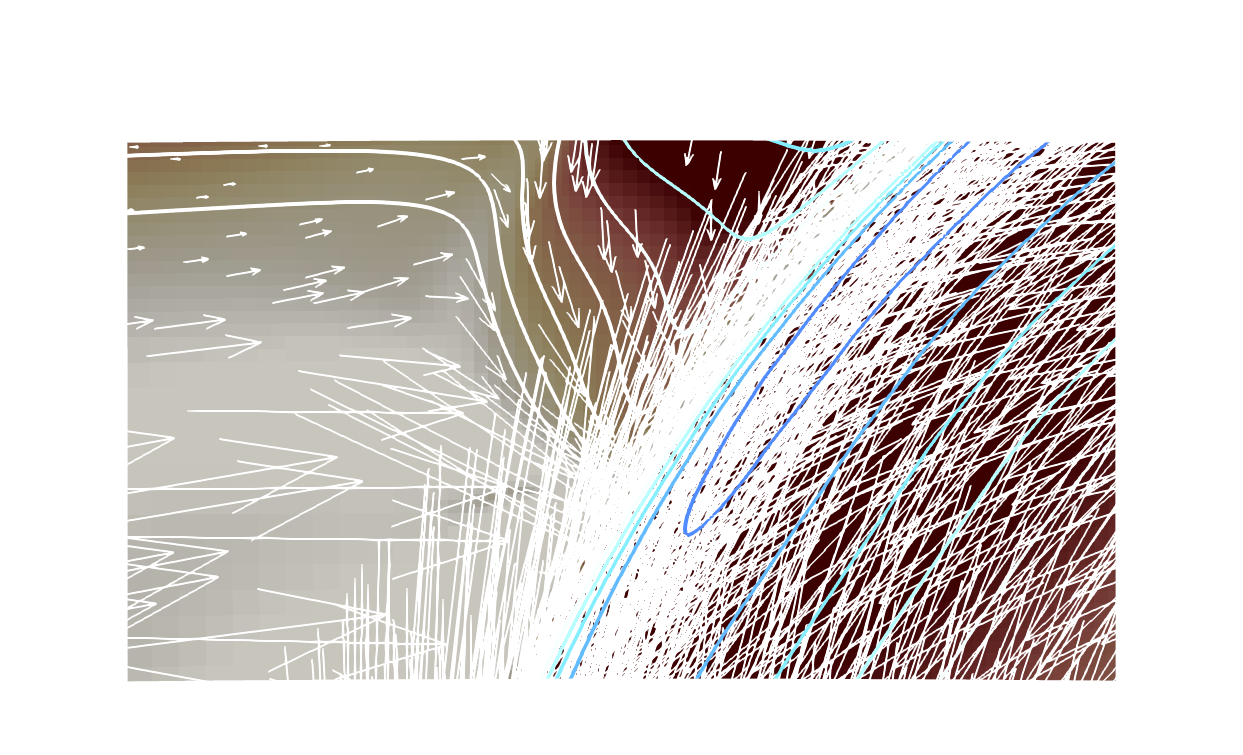

Saved plot:  /mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT26/eba_cdpt_coh500_SA80.0_OA40.0_du0.8_sv19_gr12_particles_lb/img/prep/viscosity_wedge_small_t1.0000e+06.png


In [8]:
finalize_visual = True

if finalize_visual:

    from IPython.display import Image, display

    _time = 1.0e6
    
    # file types
    # file_name = "viscosity"
    # file_name = "T"
    # file_name = "spcrust_wedge"
    # file_name = "T_wedge"
    # file_name = "density"

    # file_name = "T_wedge_02252025"
    # file_name = "spcrust_wedge_02252025"
    # file_name = "strain_rate_wedge_02252025"
    # file_name = "viscosity_wedge_02252025"

    # file_name = "T_wedge_bigger"
    
    # file_name = "T_wedge_small"
    file_name = "viscosity_wedge_small"
    # file_name = "strain_rate_wedge_small"
    
    if file_name in ["viscosity", "T", "density"]:
        # frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/upper_mantle_frame_03132024_trans_with_frame-01.png"
        frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/upper_mantle_frame_12172024_trans-01.png"
        
        output_image_file = finalize_visualization_2d_12172024(local_dir, file_name, _time, frame_png_file_with_ticks, add_time=False)

    elif file_name in ["T_wedge", "spcrust_wedge", "viscosity_wedge", "strain_rate_wedge", "DM_wedge"]:
        frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/upper_mantle_frame_01162025_trans.png"
        
        output_image_file = finalize_visualization_2d_wedge_12202024(local_dir, file_name, _time, frame_png_file_with_ticks, add_time=False)
    
    elif file_name in ["T_wedge_02252025", "spcrust_wedge_02252025", "viscosity_wedge_02252025", "strain_rate_wedge_02252025", "DM_wedge_02252025"]:
        frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/wedge_frame_022522025_trans-01.png"
        
        output_image_file = finalize_visualization_2d_wedge_02252025(local_dir, file_name, _time, frame_png_file_with_ticks, add_time=False)

    elif file_name in ["T_wedge_small", "viscosity_wedge_small", "strain_rate_wedge_small"]:
        frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/wedge_small_frame_03272025_trans.png"
        output_image_file = finalize_visualization_2d_wedge_small_03282025(local_dir, file_name, _time, frame_png_file_with_ticks, add_time=False)


    elif file_name in ["T_wedge_bigger"]:
        frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/wedge_frame_11272024_trans.png"
        # frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/wedge_frame_11272024_trans_with_trench_frame.png"

        output_image_file = finalize_visualization_2d_wedge_02122025(local_dir, file_name, _time, frame_png_file_with_ticks, add_time=False)

    else:
        raise ValueError("File name error (%s)" % file_name)

    # Displays the final combined image in the notebook.
    display(Image(filename=output_image_file))

    print("Saved plot: ", output_image_file)

#### Plot the horizontal average profile

In [ ]:
plot_da = False

if plot_da:

    plot_time = 0
    # plot_time = 0.2e6

    depth_average_path = os.path.join(local_dir, 'output', 'depth_average.txt')
    assert(os.path.isfile(depth_average_path))

    fig_path_base = os.path.join(local_dir, 'img', 'DepthAverage.pdf')
    PlotDepthAverage.PlotDaFigure(depth_average_path, fig_path_base, time=plot_time)

#### Plot the viscosity profile

In [ ]:
# Calculate the viscosity profile

plot_viscosity_profile = False

if plot_viscosity_profile:
    from shilofue.TwoDSubduction0.Cases import CASE, CASE_OPT
    from shilofue.Cases import create_case_with_json


    # Load a JSON file and create a case instance with options.
    json_opt = os.path.join(local_dir, "case.json")  # Path to the JSON configuration file.
    assert(os.path.isfile(json_opt))  # Ensure the JSON file exists.

    Case_local_reload = create_case_with_json(json_opt, CASE, CASE_OPT, is_reload=True)  # Load case with options.

    print(Case_local_reload.viscosity_profile)  # Output the viscosity profile.

    # Extract relevant fields from the viscosity profile for plotting.
    depth = Case_local_reload.viscosity_profile['depth']  # Depth values (in meters).
    T = Case_local_reload.viscosity_profile['T']  # Temperature values (in Kelvin).
    P = Case_local_reload.viscosity_profile['P']  # Pressure values (in Pascals).
    diffusion = Case_local_reload.viscosity_profile['diffusion']  # Diffusion viscosity values.
    dislocation = Case_local_reload.viscosity_profile['dislocation']  # Dislocation viscosity values.
    composite = Case_local_reload.viscosity_profile['composite']  # Composite viscosity values.

    # Plot options for visualizing data.
    depth_limit = (0, 3000)  # Depth axis range (in kilometers).
    depth_tick_interval = 500  # Tick interval for depth axis.

    P_limit = (0, 150)  # Pressure axis range (in GPa).
    P_tick_interval = 50.0  # Tick interval for pressure axis.

    T_limit = (0, 3000)  # Temperature axis range (in Kelvin).
    T_tick_interval = 1000.0  # Tick interval for temperature axis.

    viscosity_limit = (1e18, 1e24)  # Viscosity axis range (in Pa·s, logarithmic scale).
    viscosity_tick_interval = 1.0  # Tick interval for viscosity axis (log scale).

    # Scaling parameters for plots.
    scaling_factor = 2.0  # General scaling factor for the plot size.
    font_scaling_multiplier = 2.25  # Extra scaling for fonts.
    legend_font_scaling_multiplier = 0.5  # Scaling for legend fonts.
    line_width_scaling_multiplier = 2.0  # Extra scaling for line widths.

    # Scale matplotlib parameters based on specified factors.
    plot_helper.scale_matplotlib_params(
        scaling_factor, 
        font_scaling_multiplier=font_scaling_multiplier,
        legend_font_scaling_multiplier=legend_font_scaling_multiplier,
        line_width_scaling_multiplier=line_width_scaling_multiplier
    )

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    # Create subplots for data visualization.
    fig, axes = plt.subplots(ncols=2, figsize=(12 * scaling_factor, 6 * scaling_factor))

    # Plot 1: Depth vs Pressure with a twin axis for Temperature.
    ax1 = axes[0]
    ax1_twin = ax1.twiny()

    plot_pressure_temperature(ax1, ax1_twin, depth, P, T)

    # Plot 2: Depth vs Viscosity components (log scale).
    ax2 = axes[1]
    plot_viscosity_components(ax2, depth, diffusion, dislocation, composite)

    # Adjust layout and display the plots.
    plt.tight_layout()
    plt.show()

    # save figure
    o_path = os.path.join(img_dir, "viscoisity_profile.png")
    fig.savefig(o_path)
    print("Saved figure: ", o_path)

    # Reset matplotlib parameters to defaults.
    plt.rcdefaults()

### Plot Case outputs for publication

#### Visualization, pt 1 : run paraview

run the following command with the script generated in the last block:

    paraview --script {paraview scripts}

or run without gui: 

    pvpython {paraview scripts}


#### adjust camera, run the following in Tools -> Python Script Editor

1. Upper mantle view:

```

# get active view
#### import the simple module from the paraview
from paraview.simple import *
#### disable automatic camera reset on 'Show'
paraview.simple._DisableFirstRenderCameraReset()

# get active view
renderView1 = GetActiveViewOrCreate('RenderView')

#-----------------------------------
# saving camera placements for views

# current camera placement for renderView1
renderView1.InteractionMode = '2D'
renderView1.CameraPosition = [0.0, 5.6e5, 2.5e7]
renderView1.CameraFocalPoint = [0.0, 6e6, 0.0]
renderView1.CameraParallelScale = 4.5e5

```

#### Plot Slab Morphology

##### Analyze slab morphology.

Interval to analyze.
0.5e6 is tested to give the best results in terms of capturing the trending and smearing out minor spikes.

    time_interval

In [ ]:
# remove old results
# old_slab_morph_path = os.path.join(local_dir, "vtk_outputs", "slab_morph.txt")
# if os.path.isfile(old_slab_morph_path):
#     os.remove(old_slab_morph_path)

In [ ]:
# option 1: run it here in series

# time_interval = 0.5e6

# TwoDVtkPp.SlabMorphologyCase(local_dir, rewrite=1, findmdd=True, time_interval=time_interval, project_velocity=True, findmdd_tolerance=0.1)

In [ ]:
# option 2: print the command to run and run in parallel in a terminal

# time_interval = 0.1e6

if True:

    command = "python -m shilofue.TwoDSubduction0.VtkPp morph_case_parallel -i %s -ti %.4e" % (local_dir, time_interval)
    
    print("python command:")
    print(command)

    with open(py_temp_file, 'a') as fout:
        fout.write("# Run slab morphology analysis\n")
        fout.write("%s\n" % command)

##### Analyze velocity around the mdds

In [ ]:
analyze_velocity_mdds = False

if analyze_velocity_mdds:

    _time = 5e6
    Ro = 6371e3

    from matplotlib import rcdefaults
    from matplotlib.ticker import MultipleLocator

    # Retrieve the default color cycle
    default_colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

    # Example usage
    # Rule of thumbs:
    # 1. Set the limit to something like 5.0, 10.0 or 50.0, 100.0 
    # 2. Set five major ticks for each axis
    scaling_factor = 1.0  # scale factor of plot
    font_scaling_multiplier = 2.0 # extra scaling multiplier for font
    legend_font_scaling_multiplier = 0.5
    line_width_scaling_multiplier = 2.0 # extra scaling multiplier for lines
    x_lim = (-10.0, 10.0)
    x_tick_interval = 5.0   # tick interval along x
    y_lim = (0.0, 5.0)
    y_tick_interval = 1.0  # tick interval along y
    y_lim1 = (0.0, 125.0)
    y_tick_interval1 = 25.0  # tick interval along y
    n_minor_ticks = 4  # number of minor ticks between two major ones

    # scale the matplotlib params
    plot_helper.scale_matplotlib_params(scaling_factor, font_scaling_multiplier=font_scaling_multiplier,\
                            legend_font_scaling_multiplier=legend_font_scaling_multiplier,
                            line_width_scaling_multiplier=line_width_scaling_multiplier)

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    # todo_mdd
    _, _, vtu_step =  Visit_Options.get_timestep_by_time(_time)

    # Plot using polar coordinates
    fig, ax = plt.subplots(figsize=(8*scaling_factor, 5*scaling_factor))
    ax1 = ax.twinx()

    file_names = ["mdd_extract_profile_%.5d_depth_40.00km.txt" % vtu_step, 
                  "mdd_extract_profile_%.5d_depth_70.00km.txt" % vtu_step, 
                  "mdd1_profile_%.5d.txt" % vtu_step, "mdd2_profile_%.5d.txt" % vtu_step]

    for i, file_name in enumerate(file_names):

        filein = os.path.join(local_dir, "vtk_outputs", file_name) 
        
        with open(filein, 'r') as fin:
            data = np.loadtxt(filein)

        # read values
        xs = data[:, 0]
        ys = data[:, 1]
        vx = data[:, 2]
        vy = data[:, 3]

        # derived values
        r = np.sqrt(xs**2 + ys**2)
        depth = Ro - (xs**2.0 + ys**2.0)**0.5
        fai = np.arctan2(ys, xs)

        vr = vx * np.cos(fai) + vy * np.sin(fai)
        vfai = -vx * np.sin(fai) + vy * np.cos(fai)
        v_mag = np.sqrt(vx**2 + vy**2)
        v_angle = np.pi + np.arctan2(vr, vfai)

        # center point
        n_c = int((data.shape[0]-1)/2)
        fai_c = fai[n_c]

        dist = r*(fai - fai_c)

        ax.plot(dist/1e3, 100.0*v_mag, "-", label="Magnitude (%s)" % file_name)
        ax1.plot(dist/1e3, v_angle*180.0/np.pi, "--", label="Angle")

    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax1.set_ylim(y_lim1)

    ax.xaxis.set_major_locator(MultipleLocator(x_tick_interval))
    ax.xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
    ax.yaxis.set_major_locator(MultipleLocator(y_tick_interval))
    ax.yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))
    
    ax1.yaxis.set_major_locator(MultipleLocator(y_tick_interval1))
    ax1.yaxis.set_minor_locator(MultipleLocator(y_tick_interval1/(n_minor_ticks+1)))

    ax.grid()

    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Velocity, Mag (cm/yr)")
    ax1.set_ylabel("Velocity, Angle (degree)")

    ax.legend()


    # Adjust spine thickness for this plot
    for spine in ax.spines.values():
        spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)

    # Reset rcParams to defaults

    fig_path = os.path.join(local_dir, "img", "mdd_velocities_%05d.pdf" % vtu_step)
    fig.savefig(fig_path)
    print("Saved figure: %s" % fig_path)

    plt.show()
    
    rcdefaults()

##### plot slab morphology.

In [ ]:
plot_morphology = False

if plot_morphology:

    SlabPlot = TwoDVtkPp.SLABPLOT('slab')
    SlabPlot.PlotMorph(local_dir, save_pdf=True, compare_shallow_trench=True)

    plt.show()

In [ ]:
from matplotlib import get_configdir

get_configdir()

#### Plot Slab Surface Temperature

##### Generate results of all steps

In [ ]:
# option 2: print the command to run and run in parallel in a terminal

# time_interval = 0.1e6
plot_case_slab_temperature = False

if plot_case_slab_temperature:

    command = "python -m shilofue.TwoDSubduction0.VtkPp slab_temperature_case -i %s -ti %.4e" % (local_dir, time_interval)
    
    print("python command:")
    print(command)

    with open(py_temp_file, 'a') as fout:
        fout.write("# Run slab morphology analysis\n")
        fout.write("%s\n" % command)

##### Generate results of one step

In [ ]:
from hamageolib.research.haoyuan_2d_subduction.legacy_tools import SlabTemperature

if True:

    vtu_snapshot = 105 + int(Visit_Options.options['INITIAL_ADAPTIVE_REFINEMENT']) # 0 Ma

    # Check if the folder exists and contains test files
    if not os.path.exists(local_dir) or not os.listdir(local_dir):
        raise FileExistsError("Skipping test: big test contents not found in 'big_tests/'.")

    # Make output directory and clear old files
    o_dir = os.path.join(local_dir, "vtk_outputs", "temperature")
    if not os.path.isdir(o_dir):
        os.mkdir(o_dir)

    vtu_step = max(0, int(vtu_snapshot) - int(Visit_Options.options['INITIAL_ADAPTIVE_REFINEMENT']))
    o_file = os.path.join(o_dir, "slab_temperature_%05d.txt" % vtu_step)

    _, _, _ = SlabTemperature(local_dir, vtu_snapshot, o_file, output_slab=True, fix_shallow=True,\
        offsets=[-5e3, -10e3], n_crust=Visit_Options.options["N_CRUST"], rs_n=5, interp_kind="linear")
    assert(os.path.isfile(o_file))  # assert the outputs of temperature profiles

In [ ]:
plot_case_slab_temperature_0 = False

if plot_case_slab_temperature_0:

    import matplotlib as mpl
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    from matplotlib.ticker import MultipleLocator
    
    max_depth = 250e3

    time_interval = 0.5e6
    time_end = 10.5e6
    time_inspect = 11.8e6
    x_tick_interval = 400.0   # tick interval along x
    y_tick_interval = 50.0   # tick interval along x
    n_minor_ticks = 4  # number of minor ticks between two major ones


    plot_times = np.arange(0.0, time_end, time_interval)

    # Scaling parameters for plots.
    scaling_factor = 2.0  # General scaling factor for the plot size.
    font_scaling_multiplier = 3.0  # Extra scaling for fonts.
    legend_font_scaling_multiplier = 0.5  # Scaling for legend fonts.
    line_width_scaling_multiplier = 2.0  # Extra scaling for line widths


    # Scale matplotlib parameters based on specified factors.
    plot_helper.scale_matplotlib_params(
        scaling_factor, 
        font_scaling_multiplier=font_scaling_multiplier,
        legend_font_scaling_multiplier=legend_font_scaling_multiplier,
        line_width_scaling_multiplier=line_width_scaling_multiplier
    )

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    ####
    # First plot: Separate slab surface and moho into separate figures
    # Follow the fashion of Van Keken 2023 review, fig 8
    ####
    # Colormap setup: Map time steps to colors
    cmap = cm.get_cmap('viridis')  # Choose colormap (viridis, plasma, coolwarm, etc.)
    norm = mcolors.Normalize(vmin=0, vmax=time_end/1e6)  # Normalize time range (0 to 1)

    fig = plt.figure(figsize=(14*scaling_factor, 6*scaling_factor), constrained_layout=True)
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.6)

    axes = [fig.add_subplot(gs[i]) for i in range(3)]

    # Tbot_range = [None, None] # Ranges of temeprature profile
    # Ttop_range = [None, None]
    for i, _time in enumerate(plot_times):
        # _time1, _, vtu_step = Visit_Options.get_timestep_by_time(_time)
        vtu_step = int(_time / 1e5) # debug
        slab_T_file_path = os.path.join(local_dir, "vtk_outputs", "temperature", "slab_temperature_%05d.txt" % (vtu_step))
        if os.access(slab_T_file_path, os.R_OK):
            print(f"File is accessible: {slab_T_file_path}")
        else:
            raise FileNotFoundError(f"The file at '{slab_T_file_path}' is not accessible or does not exist.")

        # Read simulation log data
        pd_data = read_aspect_header_file(slab_T_file_path)

        # Define the interpolate function for temperatures
        Tbot_func = interp1d(pd_data["depth"], pd_data["Tbot"], assume_sorted=True) 
        Ttop_func = interp1d(pd_data["depth"], pd_data["Ttop"], assume_sorted=True) 
        
        p_depths = np.arange(pd_data["depth"][0], np.min(np.array([pd_data["depth"][len(pd_data)-1], max_depth])), 1e3)
        p_Tbots = Tbot_func(p_depths)
        p_Ttops = Ttop_func(p_depths)

        print("p_Tbots.size: ", p_Tbots.size) # debug

        # Update the range of the temperature
        # if i == 0:
        #     Tbot_range[0] = p_Tbots
        #     Tbot_range[1] = p_Tbots
        #     Ttop_range[0] = p_Ttops
        #     Ttop_range[1] = p_Ttops
        # else:
        #     Tbot_range[0] = np.minimum(Tbot_range[0], p_Tbots)
        #     Tbot_range[1] = np.maximum(Tbot_range[1], p_Tbots)
        #     Ttop_range[0] = np.minimum(Ttop_range[0], p_Ttops)
        #     Ttop_range[1] = np.maximum(Ttop_range[1], p_Ttops)

        
        # plot options 
        color = cmap(norm(_time/1e6))  # Map time step to a color

        # plot results for one step
        axes[0].plot(p_Ttops - 273.15, p_depths/1e3, label="Surface T, %.1f Ma" % (_time/1e6), color=color)
        axes[1].plot(p_Tbots - 273.15, p_depths/1e3, label="Moho T", color=color)

    # set option for the first figure
    axes[0].set_xlim([0.0, 1200.0])
    axes[0].xaxis.set_major_locator(MultipleLocator(x_tick_interval))
    axes[0].xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
    axes[0].set_ylim([0, max_depth/1e3])
    axes[0].yaxis.set_major_locator(MultipleLocator(y_tick_interval))
    axes[0].yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))

    axes[0].set_xlabel("T (C)")
    axes[0].set_ylabel("z (km)")

    axes[0].grid()

    # set option for the second figure
    axes[1].set_xlim([0.0, 1200.0])
    axes[1].xaxis.set_major_locator(MultipleLocator(x_tick_interval))
    axes[1].xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
    axes[1].set_ylim([0, max_depth/1e3])
    axes[1].yaxis.set_major_locator(MultipleLocator(y_tick_interval))
    axes[1].yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))

    axes[1].set_xlabel("T (C)")
    axes[1].set_ylabel("z (km)")

    axes[1].grid()

    # Add color bar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=axes[2], ticks=np.arange(0, time_end/1e6 + 1, 5))  # Add color bar with ticks
    cbar.set_label("Time (Ma)")

    # axes[0].legend()

    # fig.tight_layout()

    # Adjust spine thickness for this plot
    all_axes = fig.get_axes()
    for ax in all_axes:
        for spine in ax.spines.values():
            spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)

    # Show figure
    plt.show()

    # Save figure
    o_path = os.path.join(local_dir, "img", "temperature", "slab_temperature_combined1.pdf")
    if not os.path.isdir(os.path.dirname(o_path)):
        os.mkdir(os.path.dirname(o_path))

    fig.savefig(o_path)
    print("Saved figure: %s" % o_path)
    
    mpl.rcParams.update(mpl.rcParamsDefault)


##### Inspect a specific time step

In [ ]:
plot_case_slab_temperature_1 = True
with_legend = False

if plot_case_slab_temperature_1:

    config = {
    "Visit_Options": Visit_Options,
    "plot_helper": plot_helper,
    "times": [10.5e6], # 1. one timestep
    # "times": resampled_df["Time"].values, # 2. all timesteps with assigned interval
    "with_legend": False
    }
  
    plot_temperature_profiles_steps(local_dir, config)

    plt.show()
    # plt.close()

#### Plot The heat flux

The following block processes and visualizes heat flux data in a specific region along a trench, based on boundary and slab morphology data

##### Boundary Data Handling

The script retrieves geometric parameters (inner and outer radii) from Visit_Options and initializes an object to read boundary output data. It processes the data to compute the heat flux between the inner and outer radii and converts the boundary coordinates from Cartesian to spherical form.

The first code block below processes the heat flux output from a single step, given a specified model time, and generates the corresponding plot. 

The second code block iterates through the steps of a single case and organizes the results of the heat flow profiles.

In [ ]:
# This block processes the heat flux output from a single step, given a specified model time, and generates the corresponding plot.
# Set the time of interest in years (8 million years), 
# retrieve the timestep corresponding to the specified time, 
# construct the input file path based on the timestep, 
# and print details about the file, time, and timestep.

plot_heat_flow_timestep = True

# times and timesteps
times = resampled_df["Time"].values # 1. use all time steps
time_steps = resampled_df["Time step number"].values # use values
# times = [3e6] # 2. use a specific time and figure out the time step
# idx = np.argmin(np.abs(resampled_df["Time"].values - times[0]))
# time_steps = [resampled_df["Time step number"].values[idx]]  # yr, assign values


Ro = 6371e3

use_shallow_trench = True

if plot_heat_flow_timestep:

    hf_dir = os.path.join(local_dir, "img", "heat_flux")
    if not os.path.isdir(hf_dir):
        os.mkdir(hf_dir)

    from matplotlib import rcdefaults
    from matplotlib.ticker import MultipleLocator

    # Retrieve the default color cycle
    default_colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

    # factors for scaling
    scaling_factor = 1.75  # scale factor of plot
    font_scaling_multiplier = 3.0 # extra scaling multiplier for font
    legend_font_scaling_multiplier = 0.75
    line_width_scaling_multiplier = 2.0 # extra scaling multiplier for lines
    x_lim = (3.0, -1.0) # degree
    x_tick_interval = 1.0  # tick interval along x
    y_lim = (0.0, 120.0)
    y_tick_interval = 20.0  # tick interval along y
    n_minor_ticks = 4  # number of minor ticks between two major ones

    # scale the matplotlib params
    plot_helper.scale_matplotlib_params(scaling_factor, font_scaling_multiplier=font_scaling_multiplier,\
                            legend_font_scaling_multiplier=legend_font_scaling_multiplier,
                            line_width_scaling_multiplier=line_width_scaling_multiplier)

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    for i, _time in enumerate(times):

        fig, ax = plt.subplots(figsize=(8*scaling_factor, 5*scaling_factor))
        
        ax1 = ax.twinx()
    
        # Retrieves the heat flow profile based on the given parameters.
        hfs_masked, Phis_masked, mdds, trench_40km, shallow_trench = HeatFlowRetriveProfile(local_dir, _time, time_steps[i], Visit_Options)
        if shallow_trench is None:
            raise ValueError("shallow trench value is not accessible for case %s" % local_dir)

        phi0, phi1 = Phis_masked[0], Phis_masked[-1]
        mdd1_depth, mdd2_depth = mdds[0], mdds[1]
        mdd_Ls = TwoDVtkPp.SlabEnvelopRetrivePoints(local_dir, _time, Visit_Options, np.array(mdds))

        # Fit a smoothing spline to the data (s=0 gives an exact fit, increase 's' to smooth more)
        # Then calculate the first and second derivative of heat flow with respect to longitude
        hfs_spline = UnivariateSpline(Phis_masked, hfs_masked, s=0)
        dhf_dphi = hfs_spline.derivative(n=1) # unit: mw / rad

        # migrate the value of phi to center on the trench
        if use_shallow_trench:
            trench = shallow_trench
        else:
            trench = trench_40km
        ax.plot((Phis_masked - trench) * 180.0 / np.pi, hfs_masked * 1000.0, color=default_colors[0])
        ax1.plot((Phis_masked - trench) * 180.0 / np.pi, dhf_dphi(Phis_masked)/Ro*1e6, linestyle='-.', color=default_colors[0]) # unit: 1e6 * mw / m^3
        print("mdd1_depth: %.2f, mdd_Ls[0] - trench: %.2f" % (mdd1_depth, (mdd_Ls[0] - trench) * 180.0 / np.pi)) # debug
        ax.axvline((mdd_Ls[0] - trench) * 180.0 / np.pi, linestyle="--", color=default_colors[0])
        # ax.axvline((mdd_Ls[1] - trench) * 180.0 / np.pi, linestyle="--")

        ax.set_xlabel("Location to trench (degree)")
        ax.set_ylabel("Heat flux (mw / m^2)")
        ax1.set_ylabel("Gradient (per km)")

        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax1.set_ylim((-1.5, 1.5))

        ax.xaxis.set_major_locator(MultipleLocator(x_tick_interval))
        ax.xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
        ax.yaxis.set_major_locator(MultipleLocator(y_tick_interval))
        ax.yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))
        
        # ax.set_xlabel("Trench Distance (Km)")
        # ax.set_ylabel("Heat Flux (mW/m^2)")
        # ax1.set_ylabel("Heat Flux Derivative (mw/m^3)")

        ax.grid()

        ax.legend()
        fig.tight_layout()
        
        # Adjust spine thickness for this plot
        for spine in ax.spines.values():
            spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)

        # output file name    
        ofile_basename = "heat_flux_top"
            
        if use_shallow_trench:
            ofile_basename += "_shallow_trench"
        else:
            pass
    
        ofile_basename += "_t%.4e" % _time

        ofile = os.path.join(hf_dir, ofile_basename + ".pdf")
        ofile_png = os.path.join(hf_dir, ofile_basename + ".png")
        
        fig.savefig(ofile)
        fig.savefig(ofile_png)

        print("Save output file %s" % (ofile))
        print("Save output file %s" % (ofile_png))

In [ ]:
# This block iterates through the steps of a single case and organizes the results of the heat flow profiles.
# HeatFlowRetriveForearcMaximumCase(local_dir, Visit_Options)

### Pick Timesteps

Pick the time steps of:

1. Slab tip reaching 660 ($t_{660}$).
2. First peak of trench motion after $t_{660}$ ($t_{p1}$), and trench velocity
3. Second peak of trench motion after $t_{660}$ ($t_{p2}$), and trench velocity

Outputs from the following block are helpful.

The t660 is extracted from the dataset.

The peak of trench motion could be picked from suggestions

In [ ]:

yr = 365 * 24 * 3600.0
radius = 6371e3

IndexByValue = lambda array_1d, val: np.argmin(abs(array_1d - val))
Resample1d = lambda array_1d, n: array_1d[np.ix_(range(0, array_1d.size, n))]

pick_timesteps_and_plot = False

if pick_timesteps_and_plot:

    # pick the right time step

    slab_morph_path = os.path.join(local_dir, "vtk_outputs", "slab_morph_t1.00e+05.txt")
    assert(os.path.isfile(slab_morph_path))

    data = np.loadtxt(slab_morph_path)
    steps = data[:, 1]
    times = data[:, 2]
    trenches = data[:, 3]
    slab_depths = data[:, 4]

    # time of slab tip reaching 660 km and the index in the list
    sfunc = interp1d(slab_depths, times, assume_sorted=True)
    t660 = sfunc(660e3)
    i660 = IndexByValue(times, t660)
    step660 = steps[i660]
    print("t660 = %.1f Ma, step660 = %d" % (t660, step660))

    t800 = sfunc(800e3)
    i800 = IndexByValue(times, t800)
    step800 = steps[i800]
    print("t800 = %.1f Ma, step800 = %d" % (t800, step800))

    t1000 = sfunc(1000e3)
    i1000 = IndexByValue(times, t1000)
    step1000 = steps[i1000]
    print("t1000 = %.1f Ma, step1000 = %d" % (t1000, step1000))

    # time of slab tip reaching 2800 km and the index in the list
    try:
        t2800 = sfunc(2800e3)
    except ValueError:
        print("t2800 = None, not reached yet")
    else:
        i2800 = IndexByValue(times, t2800)
        step2800 = steps[i2800]
        print("t2800 = %.1f Ma, step2800 = %d" % (t2800, step2800))

    # trench position
    trfunc = interp1d(trenches, times, assume_sorted=True)
    t_range = times
    tr_1st_derivatives = np.gradient(trenches, times)
    tr_2nd_derivatives = np.gradient(np.gradient(trenches, times), times)

    # trench position resampled
    # the derivatives before resampling has large variation in the value
    resampled_trenches = Resample1d(trenches, 5)
    resampled_times = Resample1d(times, 5)
    resampled_steps = Resample1d(steps, 5)
    tr_1st_resampled_derivatives = np.gradient(resampled_trenches, resampled_times)
    tr_2nd_resampled_derivatives = np.gradient(np.gradient(resampled_trenches, resampled_times), resampled_times)

    t_ranges = np.arange(0.0, times[-1] + 5e6, 5e6)
    for i in range(t_ranges.size-1):
        mask = (resampled_times > t_ranges[i]) & (resampled_times < t_ranges[i+1])
        ivmax = np.argmax(np.abs(tr_1st_resampled_derivatives[mask]))
        tvmax = resampled_times[mask][ivmax]
        vmax = tr_1st_resampled_derivatives[mask][ivmax]
        step_vmax = resampled_steps[mask][ivmax]
        print("(%.1f Ma, %.1f Ma): tvmax = %.1f Ma, step_vmax = %d, vmax = %.2e cm/yr" % (t_ranges[i]/1e6, t_ranges[i+1]/1e6, tvmax/1e6, step_vmax, vmax * radius * 100.0))

    # trench positions
    fig, ax = plt.subplots()
    ax.plot(times, trenches)
    # 1st derivatives: trench velocity, converted from rad/yr to cm/yr
    fig, ax = plt.subplots()
    ax.plot(resampled_times, tr_1st_resampled_derivatives * radius * 100, 'b')
    # 2nd derivatives: trench velocity gradient, converted from rad/yr/yr to cm/yr/yr
    ax1 = ax.twinx()
    ax1.plot(resampled_times, tr_2nd_resampled_derivatives * radius * 100, 'c--')


In [ ]:
# now, enter the picked value
Ma = 1e6
t660 = 2.7 * Ma
t_vr_max1 = 8.0 * Ma
t_vr_max2 = 12.0 * Ma

In [ ]:
plot_morph_publication = False

if plot_morph_publication:

    plt.style.use('publication_2d_morph')

    time_interval = 0.5e6
    # time_range = [0.0, times[-1]]
    time_range = [0.0, 15.0e6] # in case slab tip reaches 2890
    time_markers = [float(t660), t_vr_max1, t_vr_max2]
    # time_markers = [2.4e6, 10.3e6, 17.9e6]
    vlim = [-20.0, 20.0]
    vlim_for_ath = [-10.0, 10.0] # limit for the athenosphere velocity

    SlabPlot = TwoDVtkPp.SLABPLOT('slab')
    SlabPlot.PlotMorphPublicationBillen18(local_dir, save_pdf=True, time_interval=time_interval, time_range=time_range, time_markers=time_markers, vlim=vlim, vlim_for_ath=vlim_for_ath)

    plt.close()

    import matplotlib as mpl
    mpl.rcParams.update(mpl.rcParamsDefault)

### Combine results for one case

I take the steps from the previous block where the paraview script is generated.

In [ ]:
combine_plots_case = False

if combine_plots_case:
    # define the resize by width function to work with image.resize
    resize_by_width = lambda size, width: (int(width), int(1.0 * size[1] *  width / size[0]))

    # todo_comb
    img_dir = os.path.join(local_dir, "img")
    pv_output_dir = os.path.join(img_dir, "pv_outputs")
    assert(os.path.isdir(pv_output_dir))
    ns_image_path = os.path.join(img_dir, "newton_solver_history.png")
    assert(os.path.isfile(ns_image_path))

    # assigne this explicitly
    morph_image_path = os.path.join(local_dir, "img/morphology/trench.png")

    # new image
    # first initiate a new image
    # The work flow of the Image module includes
    # first openingthe figure and then extend that by
    # opening new figures and paste them on the first one.
    # One additional operation is appending text on the figure, this requries two additional packages
    # ImageFont and ImageDraw
    new_image_path = os.path.join(local_dir, "img", "case_combined.pdf")
    # image_size = (2700, 10000) # width, height
    image_size = (2700, int(h_last)) # width, height, do this if you want the exact height
    new_image = Image.new('RGB',image_size,(250,250,250))
    h_last = 0.0

    # 1. paste the output from the new solver
    # The figure is resized by the width of the canvas
    ns_image = Image.open(ns_image_path)
    ns_image = ns_image.resize(resize_by_width(ns_image.size, new_image.size[0]))
    new_image.paste(ns_image, (0, 0))
    h_last += ns_image.size[1]

    # 2. paste the output of the slab morphology
    if os.path.isfile(morph_image_path):
        morph_image = Image.open(morph_image_path)
        morph_image = morph_image.resize(resize_by_width(morph_image.size, new_image.size[0]))
        new_image.paste(morph_image, (0, int(h_last)))
        h_last += morph_image.size[1]

    # 2. paste the outputs from paraview
    # Note "Visit_Options" is from a previous section where these plots are generated
    steps = Visit_Options.options['GRAPHICAL_STEPS']
    h_interval = 100
    fnt0 = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", int(h_interval / 3.0 * 2.0))
    for step in steps:
        _time = step * 0.1e6
        print(_time) # debug
        # a. plot of viscosity 
        vis_image_path = os.path.join(pv_output_dir, "viscosity_t%.4e.png" % _time)
        assert(os.path.isfile(vis_image_path))
        vis_image = Image.open(vis_image_path)
        # print(vis_image.size)
        vis_image = vis_image.resize(resize_by_width(vis_image.size, new_image.size[0]/2.0))
        new_image.paste(vis_image, (0, int(h_last) + h_interval))
        # b. plot of the whole mantle
        vis_whole_image_path = os.path.join(pv_output_dir, "viscosity_whole_whole_t%.4e.png" % _time)
        assert(os.path.isfile(vis_whole_image_path))
        vis_whole_image = Image.open(vis_whole_image_path)
        vis_whole_image = vis_whole_image.resize(resize_by_width(vis_whole_image.size, new_image.size[0]/2.0))
        new_image.paste(vis_whole_image, (int(np.ceil(new_image.size[0]/2.0)), int(h_last) + h_interval))
        # c. plot a sub-title, including the time
        d = ImageDraw.Draw(new_image)
        d.text((int(new_image.size[0]/2.0), h_last), "t = %.2f Ma" % (_time/1e6), font=fnt0, fill=(0, 0, 0))
        h_last += (vis_image.size[1] + h_interval)


    # save to a new figure
    new_image.save(new_image_path)



### Compare between case output

* First, load the options for all cases
* Then, try to parse the tagged case names from a case_summary file
* Next, there are a few things we can do

1. plot the heat flows and put them together.

#### Select the cases to combine

In [ ]:
# Some previous examples

## Between Perplex Case and cases with different cutoff depth
# case_summary_csv = "/mnt/lochz/ASPECT_DATA/TwoDSubduction/case_summary.csv"
# base_comp_dir = "/mnt/lochz/ASPECT_DATA/TwoDSubduction" 
# case_comp_names = ["EBA_CDPT_morb_dE/eba_cdpt_coh500_SA80.0_cd7.5_log", "EBA_CDPT18_refine_wedge1/eba_cdpt_coh500_SA80.0_cd80.0_cd7.5", "EBA_CDPT18_refine_wedge1/eba_cdpt_coh500_SA80.0_cd100.0_cd7.5", "EBA_CDPT18_refine_wedge1/eba_cdpt_coh500_SA80.0_cd200.0_cd7.5"]

## Cases with different activation energy
# case_summary_csv = "/mnt/lochz/ASPECT_DATA/TwoDSubduction/case_summary.csv"
# base_comp_dir = "/mnt/lochz/ASPECT_DATA/TwoDSubduction/EBA_CDPT_morb_dE" 
# case_comp_names = ["eba_cdpt_coh500_SA80.0_cd7.5_log", "eba_cdpt_coh500_SA80.0_cd7.5_log_dEdisl100p", "eba_cdpt_coh500_SA80.0_cd7.5_log_dEdisl100n"]
# time_list = [[2.5, 6.5, 10.8], [2.2, 6.2, 10.7], [2.5, 6.8, 10.5]]

### Cases with small shear zone thickness
# base_comp_dir = "/mnt/lochz/ASPECT_DATA/TwoDSubduction" 
# case_comp_names = ["EBA_CDPT_morb_dE/eba_cdpt_coh500_SA80.0_cd7.5_log", "EBA_CDPT26/eba_cdpt_coh500_SA80.0_OA40.0_du0.8_sv19_gr12_particles_lb"]
# time_list = [[2.5, 6.5, 10.8], [2.1, 5.6, 10.6]]

### Resolution tests
## FCWL cases: resolution
# case_comp_names = ["EBA_CDPT18_refine_wedge1/eba_cdpt_coh500_SA80.0_cd100.0_cd7.5", "EBA_CDPT_test_gr_0/eba_cdpt_FCWL_SA80.0_cd7.5_gr10", "EBA_CDPT_test_gr_0/eba_cdpt_FCWL_SA80.0_cd7.5_gr11", "EBA_CDPT_test_gr_0/eba_cdpt_FCWL_SA80.0_cd7.5_gr12"]
## PTWL cases
# case_comp_names = ["EBA_CDPT_morb_dE/eba_cdpt_coh500_SA80.0_cd7.5_log", "EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr10", "EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11"]
## Compare FCWL and PTWL cases
# case_comp_names = ["EBA_CDPT_test_gr_0/eba_cdpt_FCWL_SA80.0_cd7.5_gr11", "EBA_CDPT_test_gr_1/eba_cdpt_PTWL_SA80.0_cd7.5_gr11"]
## Cutoff depths
# case_comp_names = ["EBA_CDPT_refine_wedge2/eba_cdpt_SA80.0_ct7.5_cd70.0_gr11", "EBA_CDPT_refine_wedge2/eba_cdpt_SA80.0_ct7.5_cd80.0_gr11", "EBA_CDPT_refine_wedge2/eba_cdpt_SA80.0_ct7.5_cd90.0_gr11", "EBA_CDPT_test_gr_0/eba_cdpt_FCWL_SA80.0_cd7.5_gr11"]

In [ ]:
from shilofue.TwoDSubduction0.Cases import CASE, CASE_OPT
from shilofue.Cases import create_case_with_json

# Whether to plot
case_summary_csv = "/mnt/lochz/ASPECT_DATA/TwoDSubduction/case_summary.csv"
base_comp_dir = "/mnt/lochz/ASPECT_DATA/TwoDSubduction" 
case_comp_names = ["EBA_CDPT18_refine_wedge1/eba_cdpt_coh500_SA80.0_cd100.0_cd7.5", "EBA_CDPT24_2/eba_cdpt_coh500_SA80.0_ss500.0_sv21_cd100.0_dc7.5", "EBA_CDPT23_4_re/eba_cdpt_coh500_cd100.0_cd7.5_sv19"]
# case_comp_names = ["EBA_CDPT_test_gr_4/eba_cdpt_FCWL_SA40.0_OA20.0_cd7.5_ss500.0_gr11", "EBA_CDPT_test_gr_4/eba_cdpt_PTWL_SA40.0_OA20.0_cd7.5_ss500.0_gr11"]

# case_comp_names = ["EBA_CDPT23_6/eba_cdpt_coh500_SA80.0_ss100.0",  "EBA_CDPT_test_gr_3/eba_cdpt_FCWL_SA80.0_cd7.5_ss100.0_gr10", "EBA_CDPT_test_gr_3/eba_cdpt_FCWL_SA80.0_cd7.5_ss100.0_gr11"]

# case_comp_names = ["EBA_CDPT18_refine_wedge1/eba_cdpt_coh500_SA80.0_cd100.0_cd7.5", "EBA_CDPT_test_gr_0/eba_cdpt_FCWL_SA80.0_cd7.5_gr10", "EBA_CDPT_test_gr_0/eba_cdpt_FCWL_SA80.0_cd7.5_gr11"]

plot_combine_cases = True

# Cases Options
time_list = [[], [], []]

visual_file_name_list = ['viscosity']

Ro = 6371e3

# Retrieve the default color cycle
default_colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]
colors = [
    'blue',       # Standard blue
    'cyan',       # Bright cyan
    'red',        # Standard red
    'orange',     # Bright orange
    'purple',     # Deep purple
    'brown',      # Earthy brown
    'pink',       # Soft pink
    'gray',       # Neutral gray
    'magenta'     # Bright magenta
]

# Scaling parameters for plots.
scaling_factor = 2.0  # General scaling factor for the plot size.
font_scaling_multiplier = 2.25  # Extra scaling for fonts.
legend_font_scaling_multiplier = 0.5  # Scaling for legend fonts.
line_width_scaling_multiplier = 2.0  # Extra scaling for line widths


if plot_combine_cases:

    # # Scale matplotlib parameters based on specified factors.
    # plot_helper.scale_matplotlib_params(
    #     scaling_factor, 
    #     font_scaling_multiplier=font_scaling_multiplier,
    #     legend_font_scaling_multiplier=legend_font_scaling_multiplier,
    #     line_width_scaling_multiplier=line_width_scaling_multiplier
    # )

    # # Update font settings for compatibility with publishing tools like Illustrator.
    # plt.rcParams.update({
    #     'font.family': 'Times New Roman',
    #     'pdf.fonttype': 42,
    #     'ps.fonttype': 42
    # })

    use_shallow_trench = True

    # assert directory exists
    assert(os.path.isfile(case_summary_csv))
    assert(os.path.isdir(base_comp_dir))

    Case_Summary = CASE_SUMMARY(VISIT_OPTIONS=VISIT_OPTIONS)
    Case_Summary.import_file(case_summary_csv)

    Visit_Options_list = []
    Official_Name_list = []
    Case_Objects_list = []
    for i in range(len(case_comp_names)):
        local_comp_dir = os.path.join(base_comp_dir, case_comp_names[i])
        assert(os.path.isdir(local_comp_dir))
        Visit_Options = VISIT_OPTIONS(local_comp_dir)
        Visit_Options.Interpret()
        Visit_Options_list.append(Visit_Options)
        Official_Name_list.append(Case_Summary.sort_out_case_attribute_by_absolution_path(local_comp_dir, "names"))

        # Load a JSON file and create a case instance with options.
        json_opt = os.path.join(local_comp_dir, "case.json")  # Path to the JSON configuration file.
        assert(os.path.isfile(json_opt))  # Ensure the JSON file exists.

        Case_local_reload = create_case_with_json(json_opt, CASE, CASE_OPT, is_reload=True)  # Load case with options.
        Case_Objects_list.append(Case_local_reload)

    print(Official_Name_list)

#### Plot the slab morphology

In [ ]:
from hamageolib.utils.file_reader  import read_aspect_header_file
from matplotlib.ticker import MultipleLocator

plot_morphology = True

if plot_morphology:

    from shilofue.TwoDSubduction0.VtkPp import SLABPLOT
    
    import matplotlib as mpl

    # Scale matplotlib parameters based on specified factors.
    plot_helper.scale_matplotlib_params(
        scaling_factor, 
        font_scaling_multiplier=font_scaling_multiplier,
        legend_font_scaling_multiplier=legend_font_scaling_multiplier,
        line_width_scaling_multiplier=line_width_scaling_multiplier
    )

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })
    

    # Initialize the plotter
    plotter = SlabAnalysisPlotter()

    plotter.plot_options.update({
            "time_range": (0, 30e6),
            "time_major_tick_interval": 5e6,
            "trench_range": (-500, 100),
            "trench_major_tick_interval": 100,
            "depth_range": (0, 1200),
            "depth_major_tick_interval": 200,
            "velocity_range": (-30, 30),
            "velocity_major_tick_interval": 10,
        })

    # Initialize the plot for "trenches" vs "times"
    fig, axes = plt.subplots(1, 2, figsize=(15*scaling_factor, 5*scaling_factor))
    
    for i, case_comp_name in enumerate(case_comp_names):

        local_comp_dir = os.path.join(base_comp_dir, case_comp_name)

        Visit_Options = Visit_Options_list[i]
        official_name = Official_Name_list[i]

        if i == 0:
            include_additional_label = True
        else:
            include_additional_label = False
        plotter.plot_slab_analysis(axes, local_comp_dir, Visit_Options, color=default_colors[i],\
                                    include_additional_label=include_additional_label, name=official_name)

    # Adjust spine thickness for this plot
    all_axes = fig.get_axes()
    for ax in all_axes:
        for spine in ax.spines.values():
            spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)
        ax.grid()
        ax.legend()


    # Adjust layout and show the plot
    fig.tight_layout()
    plt.show()

    ofile = os.path.join(os.path.join(base_comp_dir, case_comp_names[0]), "img", "combined_morphology.pdf")
    fig.savefig(ofile)
    print("Save output file %s" % (ofile))
    
    mpl.rcParams.update(mpl.rcParamsDefault)


#### Plot the mantle decoupling depth

In [ ]:
from hamageolib.utils.file_reader  import read_aspect_header_file
from matplotlib.ticker import MultipleLocator

plot_slab_mdds = False

if plot_slab_mdds:

    from shilofue.TwoDSubduction0.VtkPp import SLABPLOT
    
    import matplotlib as mpl

    # Scale matplotlib parameters based on specified factors.
    plot_helper.scale_matplotlib_params(
        scaling_factor, 
        font_scaling_multiplier=font_scaling_multiplier,
        legend_font_scaling_multiplier=legend_font_scaling_multiplier,
        line_width_scaling_multiplier=line_width_scaling_multiplier
    )

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })
    

    # Initialize the plotter
    plotter = SlabAnalysisPlotter()

    plotter.plot_options = {
            "time_range": (0, 15e6),
            "time_major_tick_interval": 5e6,
            "trench_range": (-500, 100),
            "trench_major_tick_interval": 100,
            "depth_range": (0, 1200),
            "depth_major_tick_interval": 200,
            "velocity_range": (-15, 15),
            "velocity_major_tick_interval": 5,
        }

    # Initialize the plot for "trenches" vs "times"
    fig, axes = plt.subplots(2, 2, figsize=(15*scaling_factor, 10*scaling_factor))
    
    for i, case_comp_name in enumerate(case_comp_names):

        local_comp_dir = os.path.join(base_comp_dir, case_comp_name)

        Visit_Options = Visit_Options_list[i]
        official_name = Official_Name_list[i]

        if i == 0:
            include_additional_label = True
        else:
            include_additional_label = False
        plotter.plot_slab_mdds(axes, local_comp_dir, Visit_Options, color=default_colors[i],\
                                    include_additional_label=include_additional_label, name=official_name)

    # Adjust spine thickness for this plot
    all_axes = fig.get_axes()
    for ax in all_axes:
        for spine in ax.spines.values():
            spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)
        ax.grid()
        ax.legend()


    # Adjust layout and show the plot
    fig.tight_layout()
    plt.show()

    ofile = os.path.join(os.path.join(base_comp_dir, case_comp_names[0]), "img", "combined_mdds.pdf")
    fig.savefig(ofile)
    print("Save output file %s" % (ofile))
    
    mpl.rcParams.update(mpl.rcParamsDefault)



#### Plot the heat flux

In [ ]:
from matplotlib import gridspec

plot_combine_cases_hf = True  # heat flux
# plot_combine_cases_time = None; plot_combine_cases_select = "t1000" # use a criteria for plotting time
# first lookup for the rigth time_steps
plot_combine_cases_hf_time_in = 11.5e6; time_steps = []; plot_combine_cases_select = None # use a specific time value

if plot_combine_cases_hf:

    from matplotlib import rcdefaults
    from matplotlib.ticker import MultipleLocator

    # factors for scaling
    scaling_factor = 1.75  # scale factor of plot
    font_scaling_multiplier = 3.0 # extra scaling multiplier for font
    legend_font_scaling_multiplier = 0.75
    line_width_scaling_multiplier = 2.0 # extra scaling multiplier for lines
    x_lim = (3.0, -1.0) # degree
    x_tick_interval = 1.0  # tick interval along x
    y_lim = (0.0, 150.0)
    y_tick_interval = 20.0  # tick interval along y
    n_minor_ticks = 4  # number of minor ticks between two major ones
    y_lim_gradient = (-3.0, 3.0)

    # scale the matplotlib params
    plot_helper.scale_matplotlib_params(scaling_factor, font_scaling_multiplier=font_scaling_multiplier,\
                            legend_font_scaling_multiplier=legend_font_scaling_multiplier,
                            line_width_scaling_multiplier=line_width_scaling_multiplier)

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    # Retrieve the default color cycle
    default_colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]


    fig = plt.figure(figsize=(8*scaling_factor, 10*scaling_factor))
    gs = gridspec.GridSpec(2, 1)
    ax = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[1, 0])
    
    for i in range(len(case_comp_names)): 
    
        local_comp_dir = os.path.join(base_comp_dir, case_comp_names[i])

        if plot_combine_cases_hf_time_in is not None:
            # assgin time directly
            if type(plot_combine_cases_hf_time_in) == float:
                _time = plot_combine_cases_hf_time_in
            elif type(plot_combine_cases_hf_time_in) == list:
                _time = plot_combine_cases_hf_time_in[i]
            else:
                raise ValueError()
        elif plot_combine_cases_hf_time_in is None and plot_combine_cases_select=="t1000":
            # assign time when slab tip reaches 1000 km
            t1000 = float(Case_Summary.sort_out_case_attribute_by_absolution_path(local_comp_dir, "t1000s"))
            _time = t1000

        # Retrieves the heat flow profile based on the given parameters.
        _time, _time_step, _ = Visit_Options_list[i].get_timestep_by_time(_time)
        print("time step: ", _time_step) # debug
        hfs_masked, Phis_masked, mdds, trench_40km, shallow_trench = HeatFlowRetriveProfile(local_comp_dir, _time, _time_step, Visit_Options_list[i])
        if shallow_trench is None:
            raise ValueError("shallow trench value is not accessible for case %s" % local_comp_dir)

        phi0, phi1 = Phis_masked[0], Phis_masked[-1]
        mdd1_depth, mdd2_depth = mdds[0], mdds[1]
        mdd_Ls = TwoDVtkPp.SlabEnvelopRetrivePoints(local_comp_dir, _time, Visit_Options_list[i], np.array(mdds))

        # Fit a smoothing spline to the data (s=0 gives an exact fit, increase 's' to smooth more)
        # Then calculate the first and second derivative of heat flow with respect to longitude
        hfs_spline = UnivariateSpline(Phis_masked, hfs_masked, s=0)
        dhf_dphi = hfs_spline.derivative(n=1) # unit: mw / rad

        # migrate the value of phi to center on the trench
        if use_shallow_trench:
            trench = shallow_trench
        else:
            trench = trench_40km

        color0 = default_colors[5+i]
        ax.plot((Phis_masked - trench) * 180.0 / np.pi, hfs_masked * 1000.0, label=Official_Name_list[i], color=color0, linewidth=4.0)
        ax.axvline((mdd_Ls[0] - trench) * 180.0 / np.pi, linestyle="--", color=color0)
        ax.axvline((mdd_Ls[1] - trench) * 180.0 / np.pi, linestyle="dotted", color=color0)
        ax1.plot((Phis_masked - trench) * 180.0 / np.pi, dhf_dphi(Phis_masked)/Ro*1e6, linestyle='-', color=color0, linewidth=2.0) # unit: 1e6 * mw / m^3
        print("mdd1_depth: %.2f, mdd_Ls[0] - trench: %.2f" % (mdd1_depth, (mdd_Ls[0] - trench) * 180.0 / np.pi)) # debug
        ax1.axvline((mdd_Ls[0] - trench) * 180.0 / np.pi, linestyle="--", color=color0)
        ax1.axvline((mdd_Ls[1] - trench) * 180.0 / np.pi, linestyle="dotted", color=color0)

    ax.set_xlabel("Location to trench (degree)")
    ax.set_ylabel("Heat flux (mw / m^2)")
    ax1.set_ylabel("Gradient (per km)")

    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax1.set_xlim(x_lim)
    ax1.set_ylim(y_lim_gradient)

    ax.xaxis.set_major_locator(MultipleLocator(x_tick_interval))
    ax.xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
    ax.yaxis.set_major_locator(MultipleLocator(y_tick_interval))
    ax.yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))
    
    ax1.xaxis.set_major_locator(MultipleLocator(x_tick_interval))
    ax1.xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
    ax1.yaxis.set_major_locator(MultipleLocator(0.5))
    ax1.yaxis.set_minor_locator(MultipleLocator(0.5/(n_minor_ticks+1)))
    
    # ax.set_xlabel("Trench Distance (Km)")
    # ax.set_ylabel("Heat Flux (mW/m^2)")
    # ax1.set_ylabel("Heat Flux Derivative (mw/m^3)")

    ax.grid()
    ax1.grid()

    ax.legend()
    ax1.legend()
    fig.tight_layout()
    
    # Adjust spine thickness for this plot
    for spine in ax.spines.values():
        spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)
    for spine in ax1.spines.values():
        spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)

    # output file name    
    ofile_basename = "heat_flux_top_combined"
        
    if use_shallow_trench:
        ofile_basename += "_shallow_trench"
    else:
        pass
    
    # if plot_combine_cases_hf_time is not None:
    #     ofile_basename += "_t%.2fma" % (plot_combine_cases_hf_time / 1e6)
    # if plot_combine_cases_hf_time is None and plot_combine_cases_select=="t1000":
    #     ofile_basename += "_t1000"

    plt.show()
    
    ofile = os.path.join(os.path.join(base_comp_dir, case_comp_names[0]), "img", ofile_basename + ".pdf")
    fig.savefig(ofile)
    print("Save output file %s" % (ofile))


    # Reset rcParams to defaults

    rcdefaults()

#### Plot the slab surface temperature

In [ ]:
plot_slab_temperature_combined = True
plot_mdds_with_st_combined = True

plot_combine_cases_st_time_in = 12.4e6; time_steps = []; plot_combine_cases_select = None # use a specific time value

if plot_slab_temperature_combined:
    import matplotlib as mpl
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    from matplotlib.ticker import MultipleLocator
    from hamageolib.core.AnalyticalSolution import WK2004, plate_thickness_from_age

    # set time and depth to plot
    max_depth = 150e3

    # Retrieve the default color cycle
    default_colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

    # Scaling parameters for plots.
    scaling_factor = 1.6  # General scaling factor for the plot size.
    font_scaling_multiplier = 3.0  # Extra scaling for fonts.
    legend_font_scaling_multiplier = 0.5  # Scaling for legend fonts.
    line_width_scaling_multiplier = 2.0  # Extra scaling for line widths
    x_tick_interval = 400.0   # tick interval along x
    y_tick_interval = 50.0   # tick interval along x
    n_minor_ticks = 4  # number of minor ticks between two major ones


    # Scale matplotlib parameters based on specified factors.
    plot_helper.scale_matplotlib_params(
        scaling_factor, 
        font_scaling_multiplier=font_scaling_multiplier,
        legend_font_scaling_multiplier=legend_font_scaling_multiplier,
        line_width_scaling_multiplier=line_width_scaling_multiplier
    )

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    # initiate a class for the analytical solution

    model_a = plate_thickness_from_age(80.0*1e6*year)
    model_zw = plate_thickness_from_age(40.0*1e6*year)
    constants = WK2004.Constants(
        age=80.0e6*year,            # s
        U=0.05/year,                # m/s
        theta_d=np.pi/4.0, # radians
        a=model_a,               # meters from age(in s)
        zw=model_zw,
        Ta=1573.15,             # Kelvin
        Tsf=273.15,
        kappa=1e-6,
        rho=3300.0,
        cp=1250.0, # J Kg^-1 K^-1
        plate_T_model=0
    )
    
    WK_model = WK2004(constants)
    mask_zw = (p_depths > model_zw)
    
    model_T1 = np.full(p_depths.shape, WK_model.Tsf)
    model_Ts = np.full(p_depths.shape, WK_model.Tsf)
    model_alphas = np.full(p_depths.shape, 0.0)
    Tbd_array = []
    
    with Mute():
        model_T1[mask_zw] = WK_model.mw_temperature(p_depths[mask_zw])
        model_Ts[mask_zw] = WK_model.ss_temperature(p_depths[mask_zw], use_top_thickness=True)
        model_alphas[mask_zw] = WK_model.top_thickness(p_depths[mask_zw])
        
    # Plot: Combine slab surface and moho into single figures
    fig, ax = plt.subplots(figsize=(8*scaling_factor, 7*scaling_factor), tight_layout=True)
    
    for i, case_comp_name in enumerate(case_comp_names): 
    
        local_dir = os.path.join(base_comp_dir, case_comp_name)
        official_name = Official_Name_list[i]

        if type(plot_combine_cases_st_time_in) == float:
            plot_combine_cases_st_time = plot_combine_cases_st_time_in
        elif type(plot_combine_cases_st_time_in) == list:
            plot_combine_cases_st_time = plot_combine_cases_st_time_in[i]
        else:
            raise ValueError()

        # plot temperature at time inspected
                
        _, _, vtu_step =  Visit_Options_list[i].get_timestep_by_time(plot_combine_cases_st_time)

        slab_T_file_path = os.path.join(local_dir, "vtk_outputs", "temperature", "slab_temperature_%05d.txt" % (vtu_step))
        if os.access(slab_T_file_path, os.R_OK):
            print(f"File is accessible: {slab_T_file_path}")
        else:
            raise FileNotFoundError(f"The file at '{slab_T_file_path}' is not accessible or does not exist.")

        # Read simulation log data
        pd_data = read_aspect_header_file(slab_T_file_path)

        # Define the interpolate function for temperatures
        Tbot_func = interp1d(pd_data["depth"], pd_data["Tbot"], assume_sorted=True) 
        Ttop_func = interp1d(pd_data["depth"], pd_data["Ttop"], assume_sorted=True) 
        Toffset_0_func = interp1d(pd_data["depth"], pd_data["Toffset 0"], assume_sorted=True) 
        Toffset_1_func = interp1d(pd_data["depth"], pd_data["Toffset 1"], assume_sorted=True) 

        # Get the plotting depth, temperatures
        p_depths = np.arange(pd_data["depth"][0], max_depth, 1e3)
        p_Tbots = Tbot_func(p_depths)
        p_Ttops = Ttop_func(p_depths)
        p_Toffset_0 = Toffset_0_func(p_depths)
        p_Toffset_1 = Toffset_1_func(p_depths)
        
        # todo_EW
        # model prediction of temperature in the top thermal bd
        alpha_constant = 17.5e3 
        model_x = 7.5e3 # distance to the "surface"
        model_bd_Ts = WK_model.bd_temperature_formula(p_Toffset_1, p_Tbots, alpha_constant, model_x)
        
        # plot options 
        # only label the surface in case there are too many labels in the figure
        color0=default_colors[5+i]
        ax.plot(p_Ttops - 273.15, p_depths/1e3, label="Surface T (%s, %s Ma)" % (official_name, plot_combine_cases_st_time/1e6), linewidth=2, color=color0)
        ax.plot(p_Tbots - 273.15, p_depths/1e3, linewidth=4, color=color0)
        ax.plot(model_T1 - 273.15, p_depths/1e3, linewidth=1, linestyle="--", color=color0)
        ax.plot(model_bd_Ts - 273.15, p_depths/1e3, linewidth=1, linestyle="-", color=color0)
        ax.plot(p_Toffset_0 - 273.15, p_depths/1e3, linewidth=2, linestyle="--", color=color0) 
        ax.plot(p_Toffset_1 - 273.15, p_depths/1e3, linewidth=2, linestyle="-.", color=color0) 
        # todo_EW

        if plot_mdds_with_st_combined:
            _, time_step, _ = Visit_Options_list[i].get_timestep_by_time(plot_combine_cases_st_time)
            hfs_masked, Phis_masked, mdds, trench_40km, shallow_trench = HeatFlowRetriveProfile(local_dir, plot_combine_cases_st_time, time_step, Visit_Options_list[i])
            if shallow_trench is None:
                raise ValueError("shallow trench value is not accessible for case %s" % local_dir)

            phi0, phi1 = Phis_masked[0], Phis_masked[-1]
            mdd1_depth, mdd2_depth = mdds[0], mdds[1]

            ax.hlines(mdd1_depth/1e3, 0.0, 1200.0, linestyle="dashdot", color=color0) # mdd1
            ax.hlines(mdd2_depth/1e3, 0.0, 1200.0, linestyle="dotted", color=color0) # mdd2

    # plot melting curves
    # Define pressure ranges for each curve in Pascals (Pa)
    rock_melting = ROCK_MELTING() # Initialize the ROCK_MELTING instance

    pressure_ranges = {
    "dry_peridotite": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "water_saturated_peridotite_low_pressure": np.linspace(0, 6e9, 100),  # 0 to 6 GPa
    "water_saturated_peridotite_high_pressure": np.linspace(6e9, 12e9, 100),  # 6 to 12 GPa
    "eclogite": np.linspace(3e9, 7.5e9, 100),  # 3 to 7.5 GPa
    "peridotite_aH2O_0.1": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "peridotite_aH2O_0.3": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "peridotite_aH2O_0.5": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "peridotite_aH2O_0.7": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "basalt_aH2O_0_3": np.linspace(0.078e9, 3.665e9, 100),  # 0.078 to 3.665 GPa
    "basalt_aH2O_0_8": np.linspace(0.078e9, 3.665e9, 100),  # 0.078 to 3.665 GPa
    "basalt_aH2O_1_3": np.linspace(0.078e9, 3.665e9, 100),  # 0.078 to 3.665 GPa
    "basalt_aH2O_1_8": np.linspace(0.078e9, 3.665e9, 100)  # 0.078 to 3.665 GPa}
    }

    styles = {
    "dry_peridotite": ("k", "-"),
    "water_saturated_peridotite_low_pressure": (default_colors[3], "--"),
    "water_saturated_peridotite_high_pressure": (default_colors[3], "--"),
    "eclogite": ("r", "-"),
    "peridotite_aH2O_0.1": ("c", "-"),
    "peridotite_aH2O_0.3": ("c", "--"),
    "peridotite_aH2O_0.5": ("g", "-"),
    "peridotite_aH2O_0.7": (default_colors[4], "--"),
    "basalt_aH2O_0_3": (default_colors[1], "--"),
    "basalt_aH2O_0_8": ("m", "--"),
    "basalt_aH2O_1_3": ("y", "--"),
    "basalt_aH2O_1_8": ("y", "--"),
    } # Colors and line styles for each curve

    solidus_list = ["basalt_aH2O_0_3", "basalt_aH2O_1_8",\
                    "water_saturated_peridotite_low_pressure", "water_saturated_peridotite_high_pressure", "peridotite_aH2O_0.7"]

    for name in solidus_list:
        # Plot each solidus curve
        # Hide the label names here in case there are too many in the figure
        func = rock_melting.solidus_data[name]
        P_Pa = pressure_ranges[name]  # Pressures in Pa
        T_K = func(P_Pa)  # Temperatures in K
        depth_km = P_Pa / 33e6
        color, linestyle = styles[name]
        ax.plot(T_K - 273.15, depth_km, color=color, linestyle=linestyle) # , label=name.replace("_", " ").title())
    
    ax.set_xlim([0.0, 1400.0])
    ax.xaxis.set_major_locator(MultipleLocator(x_tick_interval))
    ax.xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
    ax.set_ylim([max_depth/1e3, 0])
    ax.yaxis.set_major_locator(MultipleLocator(y_tick_interval))
    ax.yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))

    ax.set_xlabel("T (C)")
    ax.set_ylabel("z (km)")

    ax.legend() # hide legend, see AI finalized figures.
    ax.grid()

    # Adjust spine thickness for this plot
    all_axes = fig.get_axes()
    for ax in all_axes:
        for spine in ax.spines.values():
            spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)
    
    # Save figure
    # o_path = os.path.join(local_dir, "img", "temperature", "slab_temperature_combined2_t%.4e.pdf" % (plot_combine_cases_st_time))
    o_path = os.path.join(os.path.join(base_comp_dir, case_comp_names[0]), "img", "temperature", "slab_temperature_compare_t%.4e.pdf" % (plot_combine_cases_st_time))
    if not os.path.isdir(os.path.dirname(o_path)):
        os.mkdir(os.path.dirname(o_path))

    fig.savefig(o_path)
    print("Saved figure: %s" % o_path)
        
    # show figure
    plt.show()

    mpl.rcParams.update(mpl.rcParamsDefault)

#### Plot the peak temperature

1. It could be selected to skip non-existing files or raise an error. There is also an option to print the full path of all the found files

In [ ]:
plot_slab_peak_combined = False

if plot_slab_peak_combined:

    from hamageolib.research.haoyuan_2d_subduction.post_process import CASE_OPTIONS
    # from hamageolib.utils.handy_shortcuts_haoyuan import MUTE
    from matplotlib import gridspec


    # resample steps by a time interval
    time_interval = 5e5 # 2. use a time interval, for making animations
    
    import matplotlib as mpl
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    from matplotlib.ticker import MultipleLocator

    # set time and depth to plot
    # the depth_lim controls the range to extract maximum temperature
    depth_lim = 100e3
    pdepth_lim = [50e3, 100e3]
    pT_lim = [1000.0, 2000.0]
    pT_lim1 = [500.0, 1500.0]
    ptime_lim = [0, 15e6]

    # Retrieve the default color cycle
    default_colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

    # Scaling parameters for plots.
    scaling_factor = 1.6  # General scaling factor for the plot size.
    font_scaling_multiplier = 2.0  # Extra scaling for fonts.
    legend_font_scaling_multiplier = 0.5  # Scaling for legend fonts.
    line_width_scaling_multiplier = 2.0  # Extra scaling for line widths
    x_tick_interval = 5.0   # tick interval along x
    y_tick_interval = 100.0   # tick interval along peak temperature
    y2_tick_interval = 5.0   # tick interval along depth
    n_minor_ticks = 4  # number of minor ticks between two major ones


    # Scale matplotlib parameters based on specified factors.
    plot_helper.scale_matplotlib_params(
        scaling_factor, 
        font_scaling_multiplier=font_scaling_multiplier,
        legend_font_scaling_multiplier=legend_font_scaling_multiplier,
        line_width_scaling_multiplier=line_width_scaling_multiplier
    )

    # Update font settings for compatibility with publishing tools like Illustrator.
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    # Plot: Combine slab surface and moho into single figures
    fig = plt.figure(figsize=(8*scaling_factor, 2.5 * 7*scaling_factor), tight_layout=True)
    gs = gridspec.GridSpec(2, 1)

    ax1 = fig.add_subplot(gs[0, 0])
    ax3 = fig.add_subplot(gs[1, 0])
    
    for i, case_comp_name in enumerate(case_comp_names): 
    
        local_dir = os.path.join(base_comp_dir, case_comp_name)
        official_name = Official_Name_list[i]

        CaseOptions = CASE_OPTIONS(local_dir)
        resampled_df_local = CaseOptions.resample_visualization_df(time_interval)

        # use color scheme from matplotlib default
        color0=default_colors[5+i]

        # plot temperature at time inspected
        # record peak temperature;
        # record temperature at 100 km
        time_list = []
        depth_m_list = []; T_m_list = []
        depth_m_list1 = []; T_m_list1 = []
        T100_list = []; 
        T100_list1 = []

        for j, plot_time in enumerate(resampled_df_local["Time"]):
                
            _, _, vtu_step =  Visit_Options_list[i].get_timestep_by_time(plot_time)

            slab_T_file_path = os.path.join(local_dir, "vtk_outputs", "temperature", "slab_temperature_%05d.txt" % (vtu_step))
            if os.access(slab_T_file_path, os.R_OK):
                # print(f"File is accessible: {slab_T_file_path}")
                time_list.append(plot_time)
                pass
            else:
                continue
                # raise FileNotFoundError(f"The file at '{slab_T_file_path}' is not accessible or does not exist.")

            # Read simulation log data
            # apply mask to extract data with depth shallower than depth_lim
            # read the slab surface and moho peak temperature separately
            pd_data = read_aspect_header_file(slab_T_file_path)
            mask = (pd_data["depth"] < depth_lim)

            Ttop_array = pd_data["Ttop"][mask]
            Tbot_array = pd_data["Tbot"][mask]
            depth_array = pd_data["depth"][mask]

            # get peak temperatures
            i_m = np.argmax(Ttop_array)
            T_m = Ttop_array[i_m]
            depth_m = depth_array[i_m]
            
            i1_m = np.argmax(Tbot_array)
            T1_m = Tbot_array[i1_m]
            depth1_m = depth_array[i1_m]

            T_m_list.append(T_m)
            depth_m_list.append(depth_m)
            
            T_m_list1.append(T1_m)
            depth_m_list1.append(depth1_m)

            # get 100-km temperatures
            i_100 = np.argmin(np.abs(pd_data["depth"] - 100e3))
            T100 = pd_data["Ttop"][i_100]
            T100_1 = pd_data["Tbot"][i_100]
            T100_list.append(T100)
            T100_list1.append(T100_1)

        time_array = np.array(time_list)

        depth_m_array = np.array(depth_m_list)
        T_m_array = np.array(T_m_list)
        
        depth_m_array1 = np.array(depth_m_list1)
        T_m_array1 = np.array(T_m_list1)

        T100_array = np.array(T100_list)
        T100_array1 = np.array(T100_list1)
        
        # print(T_m_array)  # debug
        # print(depth_m_array)

        ####
        # First plot: peak temperature at the slab surface
        ####
        # Plot depth vs time
        # Label with line type and case name
        _label1 = "Temperature: %s" % case_comp_name
        _label2 = "Depth: %s" % case_comp_name
        
        ax1.plot(time_array/1e6, T_m_array, '-', color=color0, linewidth=scaling_factor*2.0, label=_label2)
        ax1.set_ylabel('Temperature (K)')
        ax1.set_ylim(pT_lim)
        ax1.tick_params(axis='y')

        ax1.xaxis.set_major_locator(MultipleLocator(x_tick_interval))
        ax1.xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
        ax1.yaxis.set_major_locator(MultipleLocator(y_tick_interval))
        ax1.yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))

        # Create a second y-axis for temperature
        ax2 = ax1.twinx()
        
        ax2.plot(time_array/1e6, depth_m_array/1e3, '--', color=color0, linewidth=scaling_factor*2.0, label=_label1)
        ax2.set_xlabel('Time (Ma)')
        ax2.set_ylabel('Depth (m)')
        ax2.set_xlim([ptime_lim[0]/1e6, ptime_lim[1]/1e6])
        ax2.set_ylim([pdepth_lim[0]/1e3, pdepth_lim[1]/1e3])
        ax2.tick_params(axis='y')
        
        ax2.yaxis.set_major_locator(MultipleLocator(y2_tick_interval))
        ax2.yaxis.set_minor_locator(MultipleLocator(y2_tick_interval/(n_minor_ticks+1)))

        # Title and layout
        plt.title('Time vs Peak Temperature at Surface')
        

        ####
        # Second plot (new subplot): surface temperature at 100-km depth
        ####
        ax3.plot(time_array/1e6, T100_array, '-', color=color0, linewidth=scaling_factor*2.0, label=_label1)
        ax3.set_ylabel('Temperature (K)')
        ax3.set_xlim([ptime_lim[0]/1e6, ptime_lim[1]/1e6])
        ax3.set_ylim(pT_lim1)
        ax3.tick_params(axis='y')

        ax3.xaxis.set_major_locator(MultipleLocator(x_tick_interval))
        ax3.xaxis.set_minor_locator(MultipleLocator(x_tick_interval/(n_minor_ticks+1)))
        ax3.yaxis.set_major_locator(MultipleLocator(y_tick_interval))
        ax3.yaxis.set_minor_locator(MultipleLocator(y_tick_interval/(n_minor_ticks+1)))
        
        # moho temperature at 100-km depth
        ax3.plot(time_array/1e6, T100_array1, '-', color=color0, linewidth=scaling_factor*4.0, label=_label1)

    # add grid and legend before finishing
    ax1.grid()
    ax1.legend()

    ax3.grid()

    # Adjust spine thickness for this plot
    all_axes = fig.get_axes()
    for ax in all_axes:
        for spine in ax.spines.values():
            spine.set_linewidth(0.5 * scaling_factor * line_width_scaling_multiplier)
    plt.show()

    # Save figure
    o_path_pdf = os.path.join(base_comp_dir, case_comp_names[0], "img", "temperature", "plot_slab_peak_combined.pdf")
    fig.savefig(o_path_pdf)

    print("Save figure %s", o_path_pdf)

#### Plot the viscosity profile

In [ ]:
plot_combine_cases_viscosity = False

if plot_combine_cases_viscosity:
    
    # Create subplots for data visualization.
    fig, axes = plt.subplots(ncols=2, figsize=(12 * scaling_factor, 6 * scaling_factor))

    # Plot 1: Depth vs Pressure with a twin axis for Temperature.
    ax1 = axes[0]
    ax1_twin = ax1.twiny()
    
    # Plot 2: Depth vs Viscosity components (log scale).
    ax2 = axes[1]

    # Loop for the cases    
    for i in range(len(case_comp_names)):

        # retrive the case object
        Case_local_reload = Case_Objects_list[i]

        # Extract relevant fields from the viscosity profile for plotting.
        depth = Case_local_reload.viscosity_profile['depth']  # Depth values (in meters).
        T = Case_local_reload.viscosity_profile['T']  # Temperature values (in Kelvin).
        P = Case_local_reload.viscosity_profile['P']  # Pressure values (in Pascals).
        diffusion = Case_local_reload.viscosity_profile['diffusion']  # Diffusion viscosity values.
        dislocation = Case_local_reload.viscosity_profile['dislocation']  # Dislocation viscosity values.
        composite = Case_local_reload.viscosity_profile['composite']  # Composite viscosity values.

        # Scaling parameters for plots.
        scaling_factor = 2.0  # General scaling factor for the plot size.
        font_scaling_multiplier = 2.25  # Extra scaling for fonts.
        legend_font_scaling_multiplier = 0.5  # Scaling for legend fonts.
        line_width_scaling_multiplier = 2.0  # Extra scaling for line widths.

        # Scale matplotlib parameters based on specified factors.
        plot_helper.scale_matplotlib_params(
            scaling_factor, 
            font_scaling_multiplier=font_scaling_multiplier,
            legend_font_scaling_multiplier=legend_font_scaling_multiplier,
            line_width_scaling_multiplier=line_width_scaling_multiplier
        )

        # Update font settings for compatibility with publishing tools like Illustrator.
        plt.rcParams.update({
            'font.family': 'Times New Roman',
            'pdf.fonttype': 42,
            'ps.fonttype': 42
        })

        # Make the plots
        if i == 0:
            plot_pressure_temperature(ax1, ax1_twin, depth, P, T)
        plot_viscosity_components(ax2, depth, None, dislocation, composite)  # diffusion, disloction, composite


    # reset lables and line styles
    legend = ax2.get_legend()  # Get the existing legend object (if any)
    if legend is not None:  # Check if a legend exists
        legend.remove()  # Remove the legend
    
    linestyles = ["-", "--"]
    lines = ax2.get_lines()
    n_lines_in_subset = 2

    for i in range(len(lines)):
        lines[i].set_color(default_colors[int(i//n_lines_in_subset)])
        lines[i].set_linestyle(linestyles[int(i%n_lines_in_subset)])
        if int(i//n_lines_in_subset == 0):
            if i == 0:
                lines[i].set_label("Dislocation, " + Official_Name_list[0])
            if i == 1:
                lines[i].set_label("Composite")
        elif int(i % n_lines_in_subset == 0):
                lines[i].set_label("Dislocation, " + Official_Name_list[int(i//n_lines_in_subset)])
        else:
            lines[i].set_label(None)
        
    plot_viscosity_components(ax2, depth, diffusion, None, None)  # diffusion, disloction, composite
    
    ax2.legend()
    ax2.grid()

    # Adjust layout and display the plots.
    plt.tight_layout()
    plt.show()

    # save figure
    o_path = os.path.join(os.path.join(base_comp_dir, case_comp_names[0]), "img", "combined_viscoisity_profile.pdf")
    fig.savefig(o_path)
    print("Saved figure: ", o_path)


#### Visualizations

In [ ]:
from IPython.display import Image, display

plot_combine_visualization = False

frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/upper_mantle_frame_03132024_trans_with_frame-01.png"

output_path = "/home/lochy/ASPECT_PROJECT/aspectLib/results/combined.png"

if plot_combine_visualization:

    file_matrix = np.full((len(time_list[0]), len(case_comp_names)), None, dtype=object)

    for i, case_comp_name in enumerate(case_comp_names):
        local_comp_dir = os.path.join(base_comp_dir, case_comp_name)
        assert(os.path.isdir(local_comp_dir))
        
        for j, time_in_ma in enumerate(time_list[i]):
            
            for k, file_name in enumerate(visual_file_name_list):

                if k > 1:
                    raise NotImplementedError("Currently takes 1 file at every step")
                
                with Mute():
                    output_image_file = finalize_visualization_2d(local_comp_dir, file_name, time_in_ma*1e6, frame_png_file_with_ticks)
                
                file_matrix[j, i] = output_image_file

    print(file_matrix)
    print(type(file_matrix))
    print(len(file_matrix.shape))
    
    plot_helper.combine_images(file_matrix, output_path)

    # Open the image and get its size
    with Image.open(output_path) as img:
        width, height = img.size
        print(f"Image dimensions: {width}x{height} pixels")

    # Displays the final combined image in the notebook.
    display(Image(filename=output_path))


In [ ]:
# Reset rcParams to defaults
plt.rcdefaults()

In [ ]:
# case_name0 = "EBA_CDPT_10/eba_cdpt_SA80.0_OA40.0_gr10_new"
# case_name = "EBA_CDPT14/eba_cdpt_SA80.0_OA40.0_gr9_Coh500.0"
# case_name1 = "EBA_CDPT14/eba_cdpt_SA80.0_OA40.0_gr9_Coh300.0"
# case_name2 = "EBA_CDPT14/eba_cdpt_SA80.0_OA40.0_gr9_Coh100.0"

# case_name = "EBA_CDPT15/eba_cdpt_nopc_SA80.0_OA40.0_gr9_Coh300.0"
# case_name1 = "EBA_CDPT15/eba_cdpt_nopc_SA80.0_OA40.0_gr9_Coh300.0_yd500"

case_name = "EBA_CDPT16/eba_cdpt_coh300_SA80.0_OA40.0_cd100.0_cd7.5_gr9_yd500"
case_name1 = "EBA_CDPT16/eba_cdpt_coh300_SA80.0_OA40.0_cd100.0_cd7.5_gr9_yd500_min_peierls"
case_name2 = "EBA_CDPT16/eba_cdpt_coh300_SA80.0_OA40.0_cd100.0_cd7.5_gr9_yd500_new_peierls"
case_name3 = "EBA_CDPT16/eba_cdpt_coh300_SA80.0_OA40.0_cd100.0_cd7.5_gr9_yd500_new_peierls_reset_corner"
case_name4 = "EBA_CDPT16/eba_cdpt_coh300_SA80.0_OA40.0_cd100.0_cd7.5_gr9_yd500_new_peierls_reset_corner_T_density"
case_name7 = "EBA_CDPT16/eba_cdpt_coh300_SA80.0_OA40.0_cd100.0_cd7.5_gr9_yd500_new_peierls_reset_corner_T_density_WH23_1_rebase"
case_name9 = "EBA_CDPT17/eba_cdpt_SA80.0_OA40.0"

json_option = \
{
	"case_root": "${TwoDSubduction_DIR}",
    "Name": "combine_figure",
	"cases": [
        case_name7,
        case_name9,
    ],
	"plots": [
        ["pv_outputs/viscosity_t7.0000e+06.png", "pv_outputs/viscosity_t1.0000e+07.png"],
        ["pv_outputs/viscosity_t7.0000e+06.png", "pv_outputs/viscosity_t1.0000e+07.png"],
    ],
    "anchor": 0,
	"same_for_all" : 0,
    "output directory": "${TwoDSubduction_DIR}/EBA_CDPT17",
    "Include title": 1,
    "Title": {
        "Title": "Comparison of the reference case with cases with weaker rheology."
    }
}

PlotCombineFigures(json_option)

### Make animation

First generate the script for visualizations.
The time interval of visualizations for animation could be set through

    time_interval = 0.5e6

#### Slab morphology plots for animaiton

In [ ]:
import os
from hamageolib.utils.file_reader  import read_aspect_header_file
from matplotlib.ticker import MultipleLocator

plot_morphology_for_ani = True

if plot_morphology_for_ani:
  
    config = {
    "resampled_df": resampled_df,
    "Visit_Options": Visit_Options,
    }

    plot_slab_morphology_series(local_dir, config)

#### Animation of upper mantle dynamics

In [ ]:
animate_upper_mantle_dynamics = True

file_paths = []

if animate_upper_mantle_dynamics:
    from IPython.display import Image, display

    for i, _time in enumerate(resampled_df["Time"].values):

        # debug run step 0
        # if i > 0:
        #     break
        
        _time = resampled_df["Time"].values[i]
        time_rounded = round(_time / float(resampled_df.attrs["Time between graphical output"]))\
              * float(resampled_df.attrs["Time between graphical output"]) 

        # Options to add time stamp
        add_time = True

        # Inputs
        # Upper mantle viscosity
        viscosity_file_name = os.path.join(local_dir, "img", "pv_outputs", "viscosity_t%.4e.png" % time_rounded)
        if (not os.path.isfile(viscosity_file_name)):
            raise FileNotFoundError(f"PNG file doesn't exist: {viscosity_file_name}")
        # make the figure of upper mantle 
        frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/upper_mantle_frame_12172024_trans_with_frame.png"
        canvas_size = (650, 500)
        viscosity_file_name_framed = finalize_visualization_2d_12172024(local_dir, "viscosity", time_rounded, frame_png_file_with_ticks, add_time=False, canvas_size=canvas_size)

        # Slab morphology 
        slab_morph_file_name = os.path.join(prep_file_dir, "combined_morphology_t%.4e.png" % _time)
        if (not os.path.isfile(slab_morph_file_name)):
            raise FileNotFoundError(f"PNG file doesn't exist: {slab_morph_file_name}")
        
        # Outputs
        # Paths to output files
        prep_file_dir = os.path.join(local_dir, "img", "animation")
        if not os.path.isdir(prep_file_dir):
            os.mkdir(prep_file_dir)
        
        prep_file_dir = os.path.join(local_dir, "img", "animation", 'prep')
        if not os.path.isdir(prep_file_dir):
            os.mkdir(prep_file_dir)

        output_image_file = os.path.join(prep_file_dir, "animation_upper_mantle_t%.4e.png" % (_time))
        if os.path.isfile(output_image_file):
            # Remove existing output image to ensure a clean overlay
            os.remove(output_image_file)

        # Overlays multiple images on a blank canvas with specified sizes, positions, cropping, and scaling.
        plot_helper.overlay_images_on_blank_canvas(
            canvas_size=(1350, 900),  # Size of the blank canvas in pixels (width, height)
            image_files=[viscosity_file_name_framed, slab_morph_file_name],  # List of image file paths to overlay
            image_positions=[(0, 500), (0, 100)],  # Positions of each image on the canvas
            cropping_regions=[None, None],  # Optional cropping regions for the images
            image_scale_factors=[0.6, 0.45],  # Scaling factors for resizing the images
            output_image_file=output_image_file  # Path to save the final combined image
        )

        # Example Usage, add_text_to_image
        # image_path = "your_image.png"  # Replace with the path to your PNG file
        # output_path = "output_image_with_text.png"  # Path to save the output image
        if add_time:
            text = "t = %.1f Ma" % (_time / 1e6)  # Replace with the text you want to add
            position = (25, 25)  # Replace with the desired text position (x, y)
            font_path = "/usr/share/fonts/truetype/msttcorefonts/times.ttf"  # Path to Times New Roman font
            font_size = 72

            plot_helper.add_text_to_image(output_image_file, output_image_file, text, position, font_path, font_size)


        # display(Image(filename=output_image_file))
        file_paths.append(output_image_file)

# create animation
output_file = os.path.join(local_dir, "img", "animation", "model.avi")
create_avi_from_images(file_paths, output_file, 1)

#### Animation of wedge temperature

In [ ]:
animate_wedge_temperature = True

# use_wedge_plot = False; use_upper_mantle_plot = True

file_paths = []

if animate_wedge_temperature:
    from IPython.display import Image, display

    for i in range(len(resampled_df["Time"].values)):

        # # debug run step 0
        # if i > 0:
        #     break
        
        _time = resampled_df["Time"].values[i]

        time_rounded = round(_time / float(resampled_df.attrs["Time between graphical output"]))\
              * float(resampled_df.attrs["Time between graphical output"]) 
        
        # Options to add time stamp
        add_time = True

        # Paths to output files
        ani_dir = os.path.join(local_dir, "img", "animation")
        if not os.path.isdir(ani_dir):
            os.mkdir(ani_dir)
        
        prep_file_dir = os.path.join(local_dir, "img", "animation", 'prep')
        if not os.path.isdir(prep_file_dir):
            os.mkdir(prep_file_dir)
        
        # Inputs
        slab_temperature_png_file_name = os.path.join(local_dir, "img", "temperature", "slab_temperature_combined2_t%.4e.png" % (_time))
        if (not os.path.isfile(slab_temperature_png_file_name)):
            raise FileNotFoundError(f"PNG file doesn't exist: {slab_temperature_png_file_name}")
        
        heat_flux_png_file_name = os.path.join(local_dir, "img", "heat_flux", "heat_flux_top_shallow_trench_t%.4e.png" % (_time))

        slab_morph_file_name = os.path.join(prep_file_dir, "combined_morphology_t%.4e.png" % _time)

        # Options

        base_name = "animation_wedge1"
        target_file_name = os.path.join(local_dir, "img", "pv_outputs", "viscosity_t%.4e.png" % time_rounded)

        if (not os.path.isfile(target_file_name)):
            raise FileNotFoundError(f"PNG file doesn't exist: {target_file_name}")

        # make the figure of upper mantle 
        frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/upper_mantle_frame_12172024_trans_with_frame.png"
    
        canvas_size = (650, 500)
        target_file_name_framed = finalize_visualization_2d_12172024(local_dir, "viscosity", time_rounded, frame_png_file_with_ticks, add_time=False, canvas_size=canvas_size)

        # make the figure of the wedge
        frame_png_file_with_ticks = "/home/lochy/Documents/papers/documented_files/TwoDSubduction/upper_mantle_frame/wedge_frame_11272024_trans_with_trench_frame.png"
        target_file_name_framed_1 = finalize_visualization_2d_wedge_02122025(local_dir, "T_wedge_bigger", time_rounded, frame_png_file_with_ticks, add_time=False)

        output_image_file = os.path.join(prep_file_dir, "%s_t%.4e.png" % (base_name, _time))
        if os.path.isfile(output_image_file):
            # Remove existing output image to ensure a clean overlay
            os.remove(output_image_file)

        # Overlays multiple images on a blank canvas with specified sizes, positions, cropping, and scaling.
        plot_helper.overlay_images_on_blank_canvas(
            canvas_size=(1000, 1100),  # Size of the blank canvas in pixels (width, height)
            image_files=[target_file_name_framed, slab_temperature_png_file_name, heat_flux_png_file_name, slab_morph_file_name, target_file_name_framed_1],  # List of image file paths to overlay
            image_positions=[(0, 100), (0, 450), (500, 450), (0, 800), (600, 100)],  # Positions of each image on the canvas
            cropping_regions=[None, None, None, None, None],  # Optional cropping regions for the images
            image_scale_factors=[0.6, 0.4, 0.4, 0.4, 0.4],  # Scaling factors for resizing the images
            output_image_file=output_image_file  # Path to save the final combined image
        )

        

        # Example Usage, add_text_to_image
        # image_path = "your_image.png"  # Replace with the path to your PNG file
        # output_path = "output_image_with_text.png"  # Path to save the output image
        if add_time:
            text = "t = %.1f Ma" % (_time / 1e6)  # Replace with the text you want to add
            position = (25, 25)  # Replace with the desired text position (x, y)
            font_path = "/usr/share/fonts/truetype/msttcorefonts/times.ttf"  # Path to Times New Roman font
            font_size = 56

            plot_helper.add_text_to_image(output_image_file, output_image_file, text, position, font_path, font_size)


        # display(Image(filename=output_image_file))
        file_paths.append(output_image_file)

    # create animation
    output_file = os.path.join(local_dir, "img", "animation", "%s.avi" % base_name)
    create_avi_from_images(file_paths, output_file, 1)